# Análisis de datos del experimento 2:

## 1) Análisis de la base de datos:

In [1]:
#Número del experimento:
exp_num = 2

In [2]:
# Copio manualmente los siguientes datos del experimento para poder saber qué base de datos leer:
max_ruido_dB = -45 
add_noise = True 
snr = [-5, 20] 
tr_aug = [0.2, 3.1, 0.1] 
drr_aug = [-6, 19, 1]

#La base de datos es: 
db_name = f'base_de_datos_{max_ruido_dB}_noise_{add_noise}_traug_{tr_aug[0]}_{tr_aug[1]}_{tr_aug[2]}_drraug_{drr_aug[0]}_{drr_aug[1]}_{drr_aug[2]}_snr_{snr[0]}_{snr[-1]}.pkl'

In [3]:
# Copio manualmente los datos de la red dentro del experimento para poder reconstruir el modelo:
#Parámetros de la red:
filters = [32, 18, 8, 4] 
kernel_size = [10, 5, 5, 5] 
activation = ['relu','relu','relu','relu'] 
pool_size = [2,2,2]
learning_rate = 0.001

In [4]:
# Importo paquetes:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import numpy as np
from scipy import stats

In [5]:
db = pd.read_pickle(f'../cache/{db_name}')
db.head()

ReverbedAudio  banda  \
0  F1s3|sintetica_Seed114774844_Tr1.0|original    125   
1  F1s3|sintetica_Seed114774844_Tr1.0|original    250   
2  F1s3|sintetica_Seed114774844_Tr1.0|original    500   
3  F1s3|sintetica_Seed114774844_Tr1.0|original   1000   
4  F1s3|sintetica_Seed114774844_Tr1.0|original   2000   

                                                 tae  \
0  [-0.0127966777400218, 0.299051731467701, 0.759...   
1  [-0.012879829992399333, 0.3353921628943207, 0....   
2  [-0.011647038329443771, 0.29615388494628236, 0...   
3  [-0.013193892703633706, 0.30074982418353086, 0...   
4  [-0.015236999246539899, 0.2995059772876189, 0....   

                                         descriptors        snr  
0  [1.0026511127340734, -5.806895460537906, -0.52...   9.878910  
1  [1.0277886488122614, -0.482205587090149, 2.832...  -1.226266  
2  [1.0706326228783705, -0.8821260633500017, 1.81...  12.515109  
3  [0.9733430762079901, 0.5506968004314619, 3.133...  18.574322  
4  [0.9814051609182717, -0.26450504717204215, 2.2...   1.318087

In [6]:
#Veo cuántos audios hay por banda:
bands = [125, 250, 500, 1000, 2000, 4000, 8000]

for band in bands:
    
    tot_data_per_band = len(db.loc[db.banda == band])
    print(f'Hay un total de {tot_data_per_band} audios reberberados para la banda {band}')

Hay un total de 4599 audios reberberados para la banda 125
Hay un total de 6002 audios reberberados para la banda 250
Hay un total de 6520 audios reberberados para la banda 500
Hay un total de 6520 audios reberberados para la banda 1000
Hay un total de 6460 audios reberberados para la banda 2000
Hay un total de 6530 audios reberberados para la banda 4000
Hay un total de 6520 audios reberberados para la banda 8000



Análisis para la banda 125



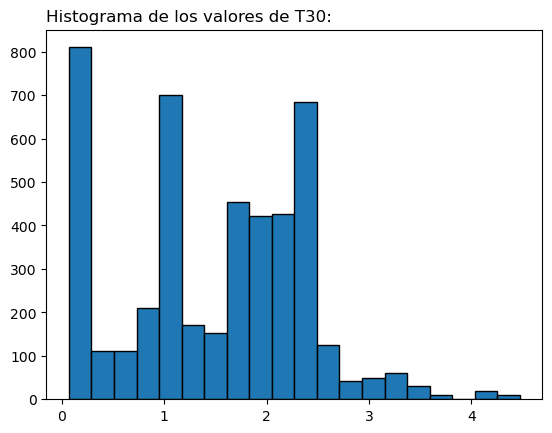

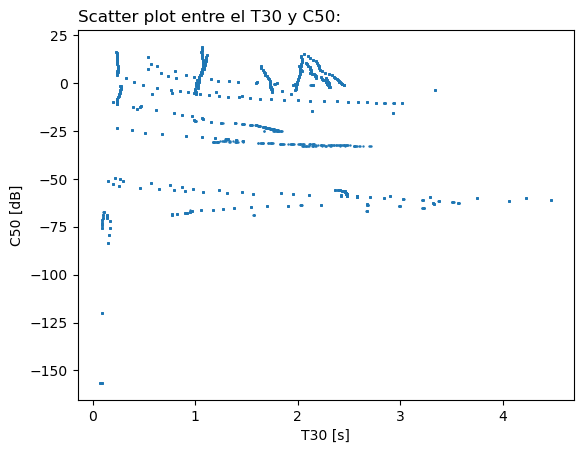

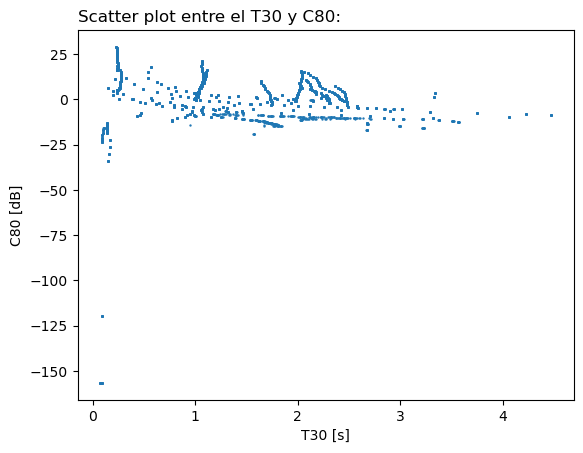

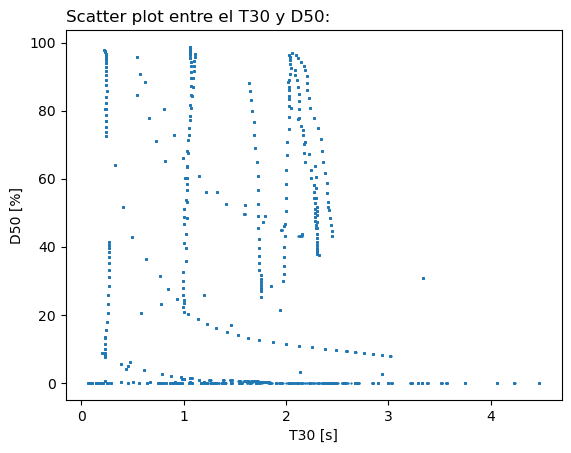


Análisis para la banda 250



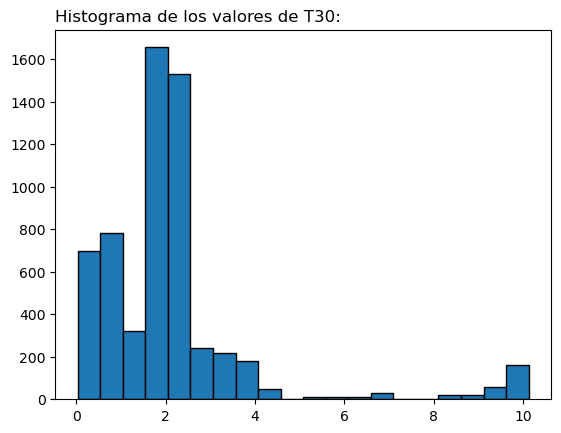

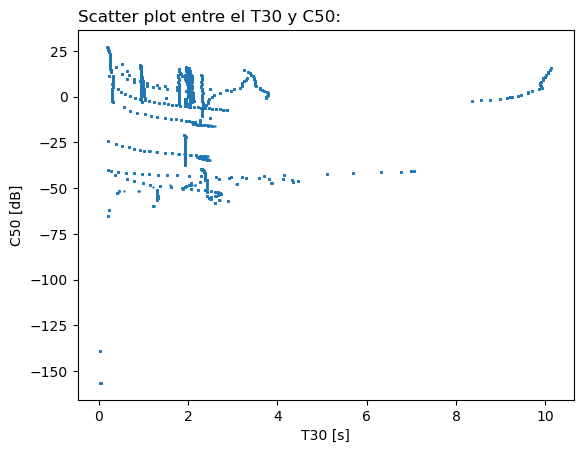

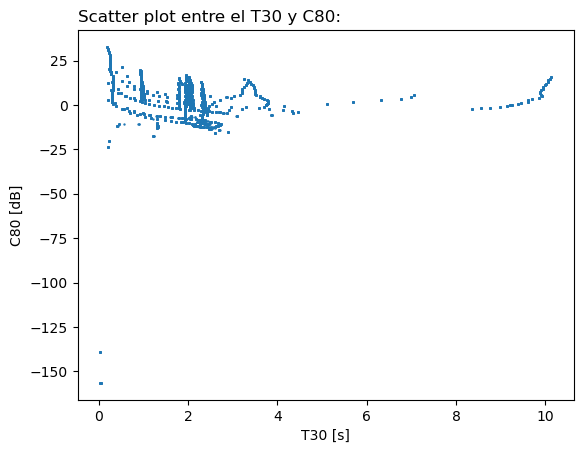

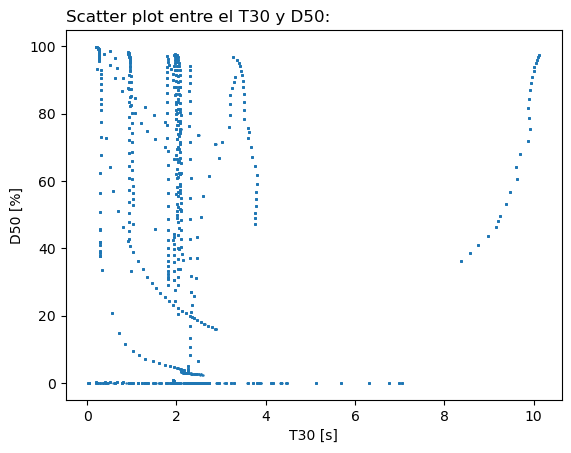


Análisis para la banda 500



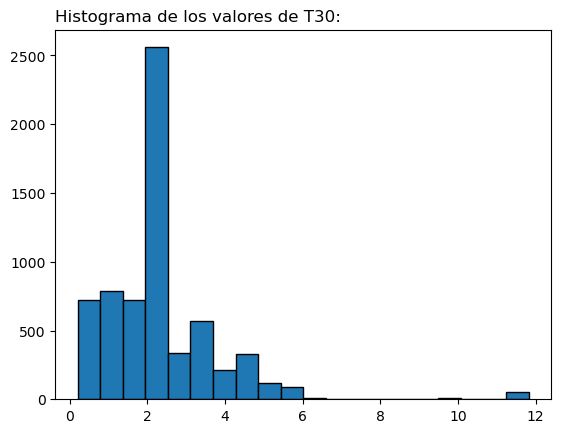

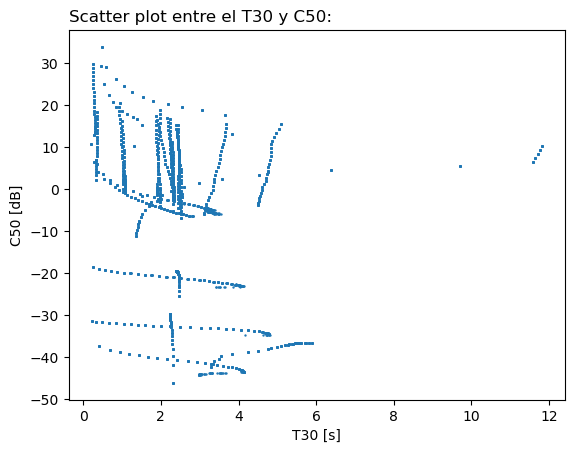

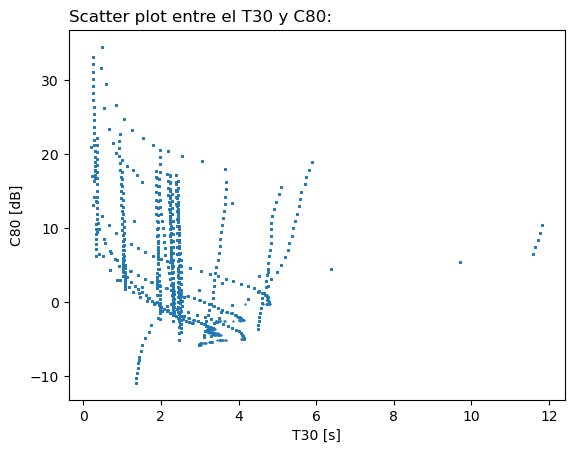

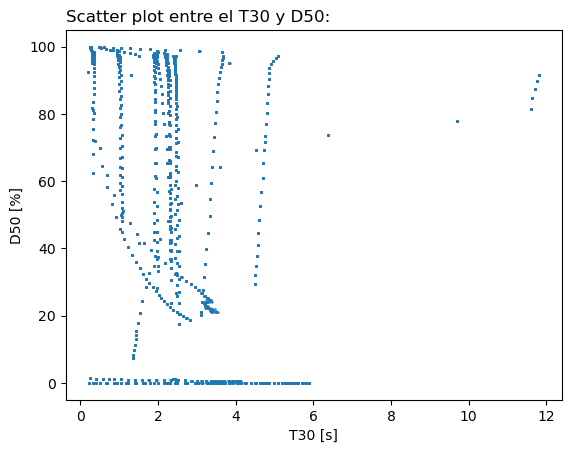


Análisis para la banda 1000



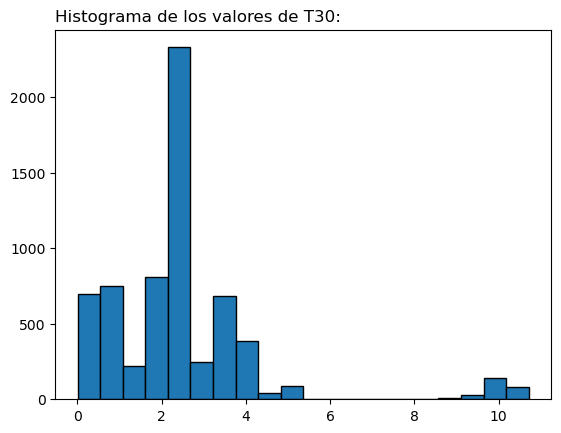

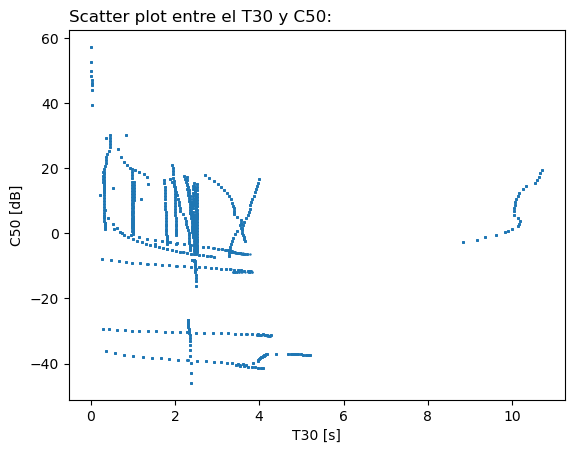

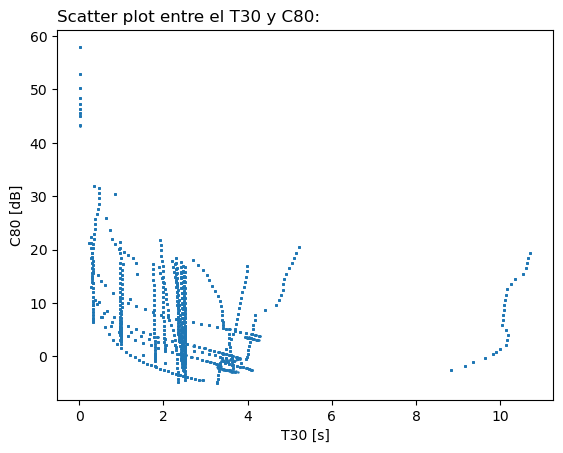

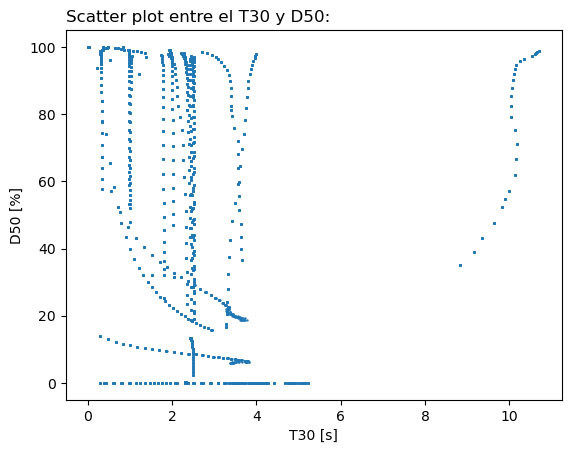


Análisis para la banda 2000



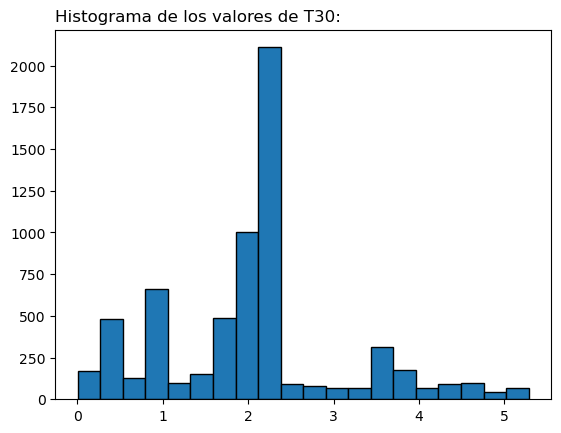

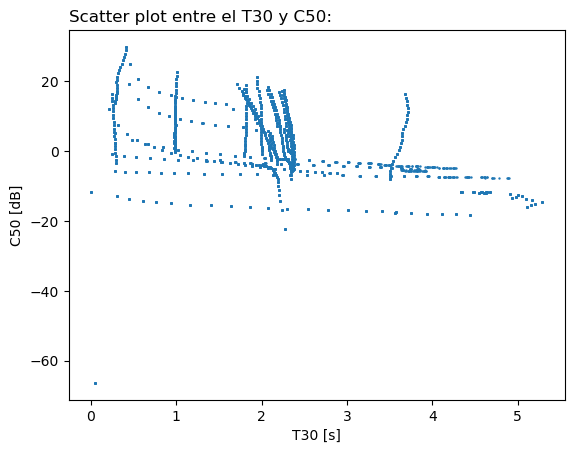

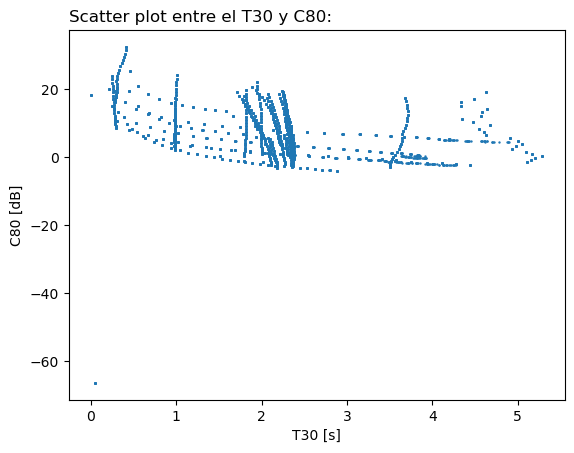

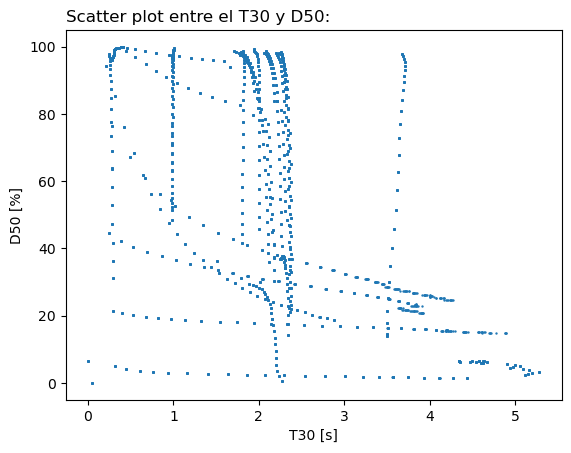


Análisis para la banda 4000



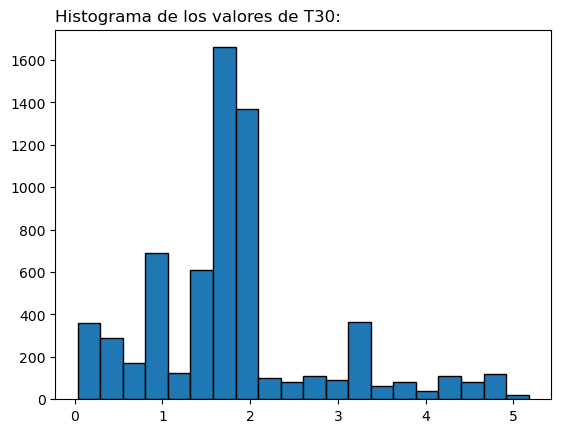

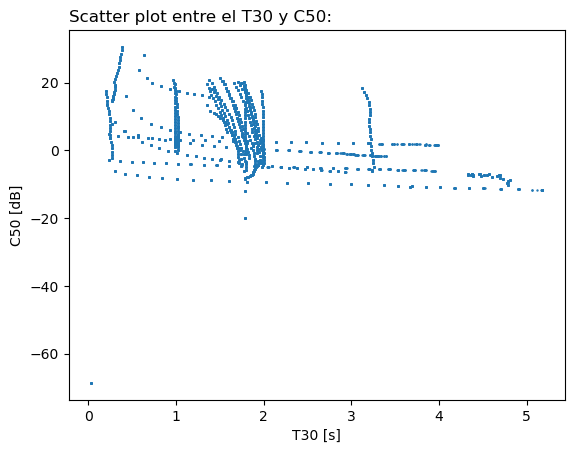

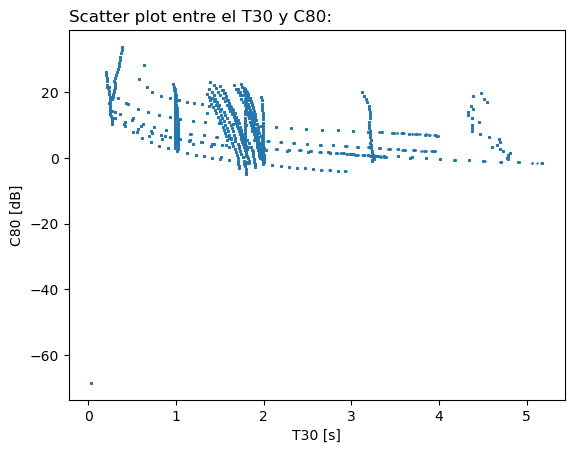

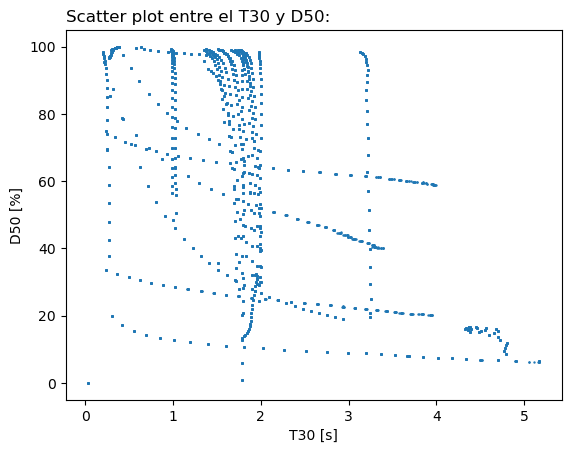


Análisis para la banda 8000



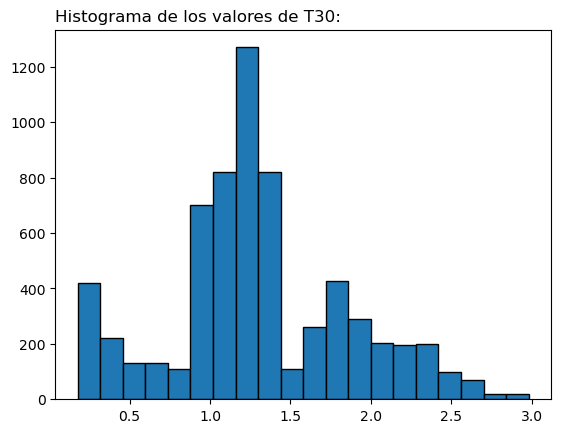

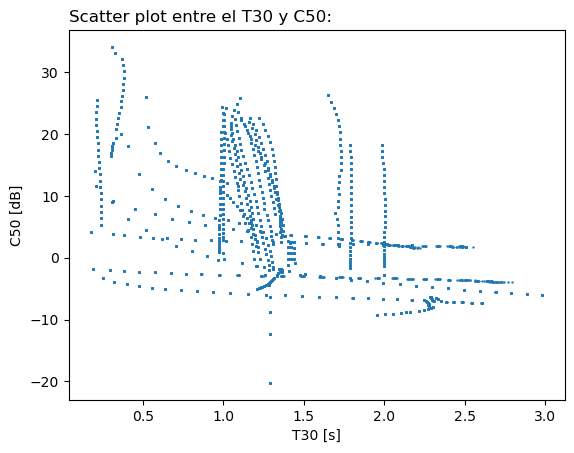

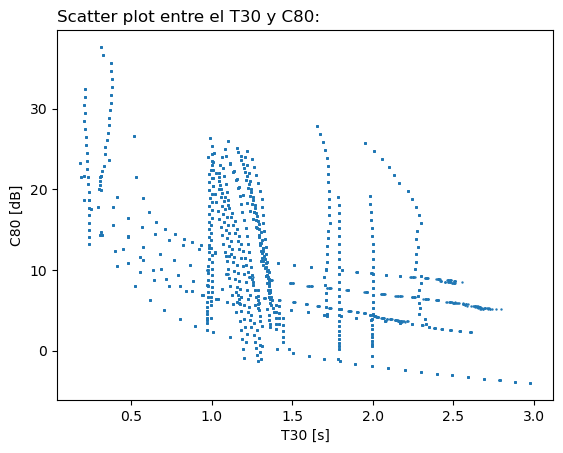

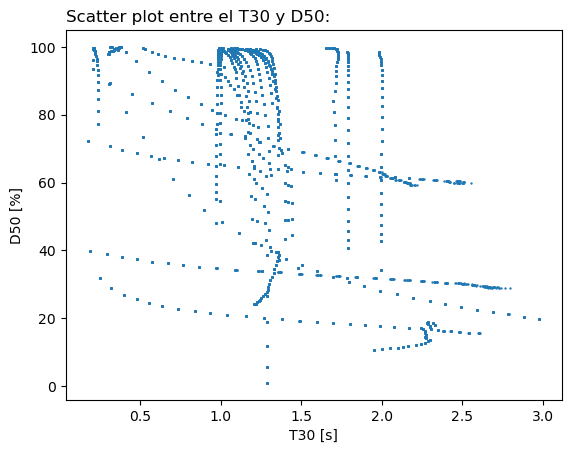

In [7]:
#Análisis de los descriptores por bandas:
for band in bands:
    db_band = db.loc[db.banda == band]

    descriptors = db_band.descriptors.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    print(f'\nAnálisis para la banda {band}\n')

    plt.hist(t30, bins=20, edgecolor="black")
    plt.title('Histograma de los valores de T30:', loc='left')
    plt.show()

    plt.plot( t30, c50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C50 [dB]')
    plt.title('Scatter plot entre el T30 y C50:', loc='left')
    plt.show()

    plt.plot( t30, c80, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C80 [dB]')
    plt.title('Scatter plot entre el T30 y C80:', loc='left')
    plt.show()

    plt.plot( t30, d50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('D50 [%]')
    plt.title('Scatter plot entre el T30 y D50:', loc='left')
    plt.show()


## 2) Análisis del entrenamiento:

### Análisis banda 125 Hz:

In [8]:
band = 125

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

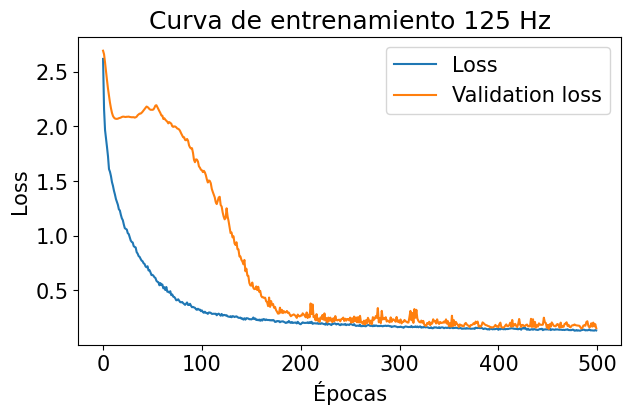

In [9]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  1.,  11.,  45., 235., 278., 235.,  94.,  21.]),
 array([-0.96  , -0.7475, -0.535 , -0.3225, -0.11  ,  0.1025,  0.315 ,
         0.5275,  0.74  ]),
 <BarContainer object of 8 artists>)

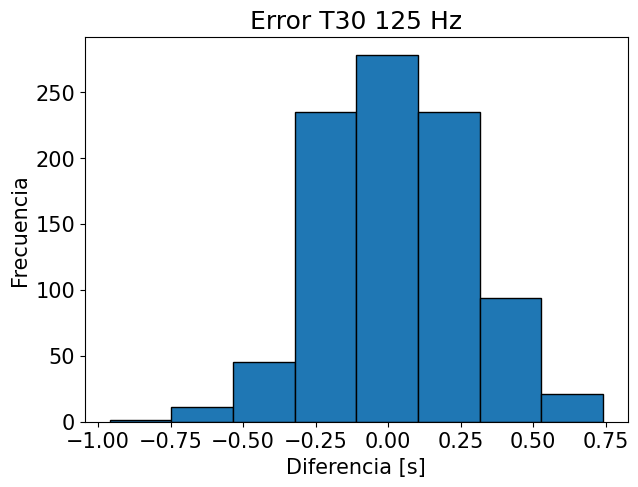

In [10]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  5., 116., 773.,  19.,   5.,   1.,   0.,   1.]),
 array([-2.96  , -1.7525, -0.545 ,  0.6625,  1.87  ,  3.0775,  4.285 ,
         5.4925,  6.7   ]),
 <BarContainer object of 8 artists>)

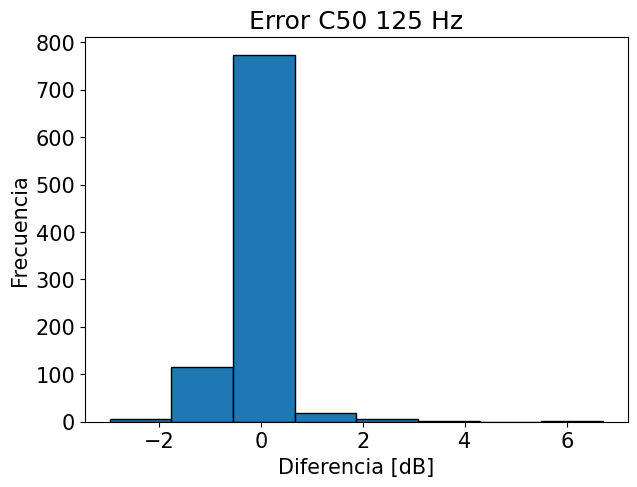

In [11]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([ 23., 776., 114.,   4.,   2.,   0.,   0.,   1.]),
 array([-1.44   , -0.62875,  0.1825 ,  0.99375,  1.805  ,  2.61625,
         3.4275 ,  4.23875,  5.05   ]),
 <BarContainer object of 8 artists>)

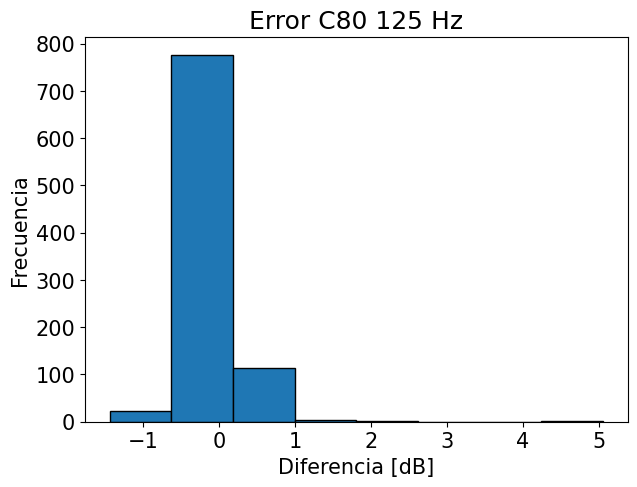

In [12]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  8.,  31., 159., 265., 207., 198.,  43.,   9.]),
 array([-0.52 , -0.405, -0.29 , -0.175, -0.06 ,  0.055,  0.17 ,  0.285,
         0.4  ]),
 <BarContainer object of 8 artists>)

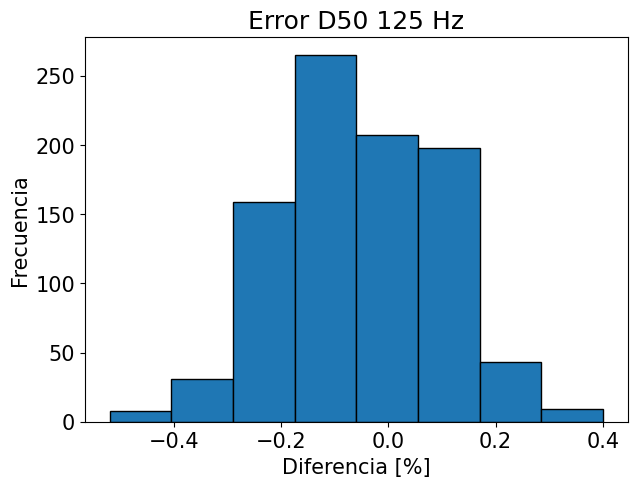

In [13]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

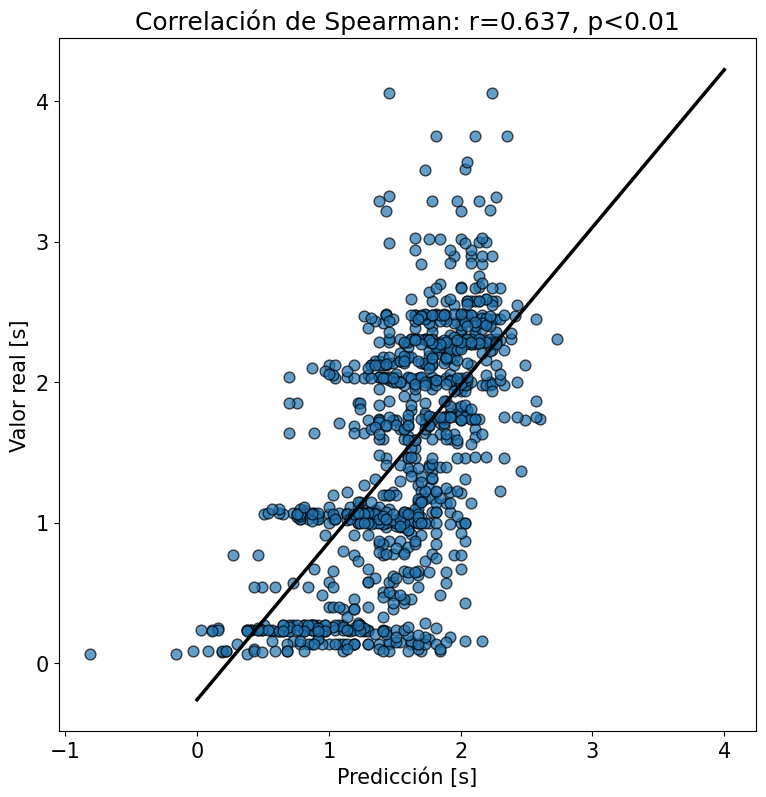

In [14]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

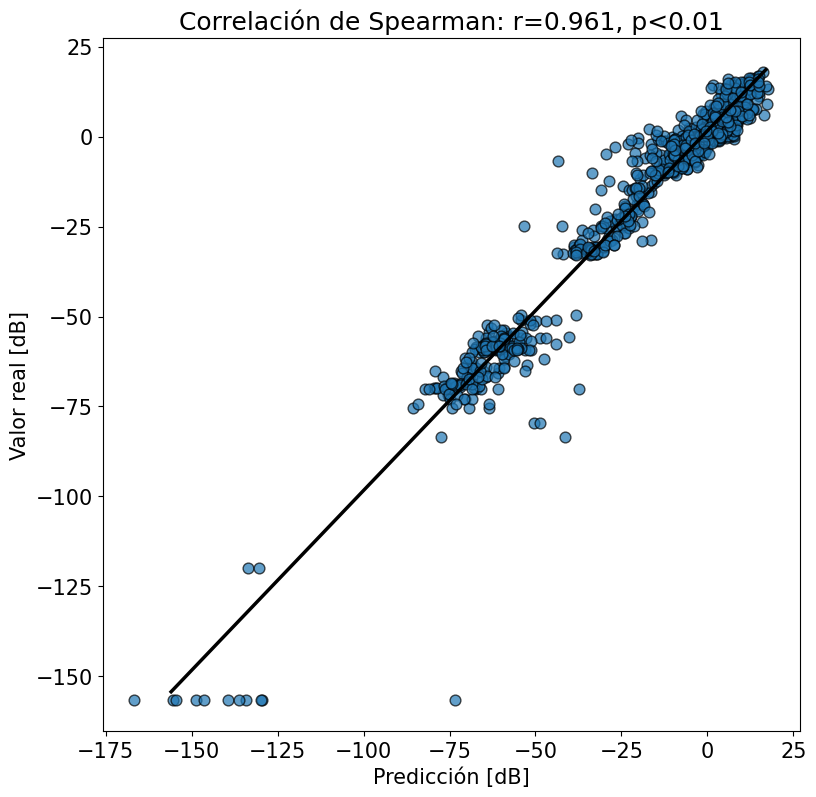

In [15]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

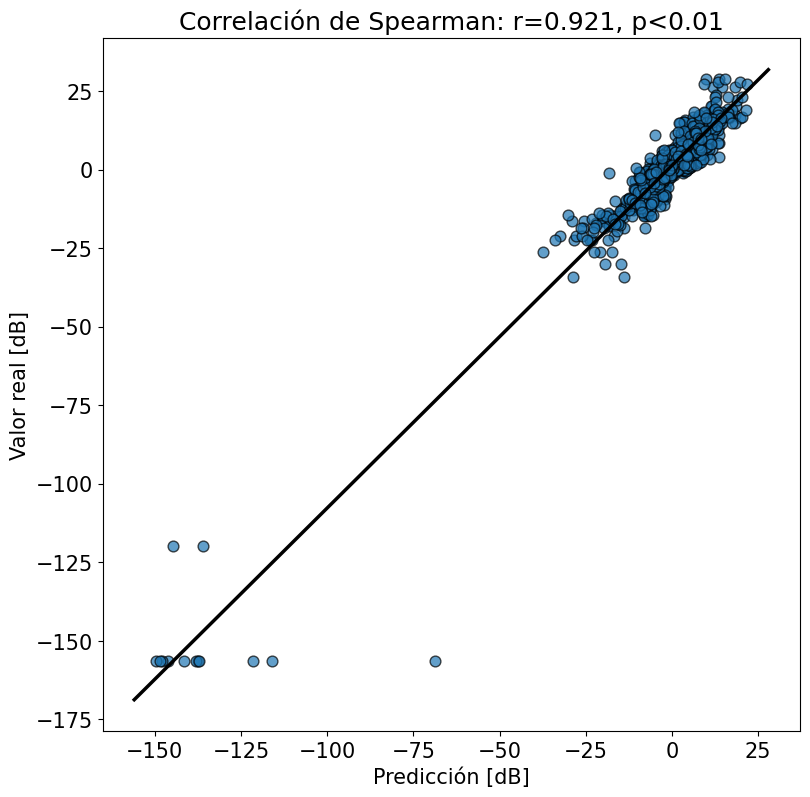

In [16]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

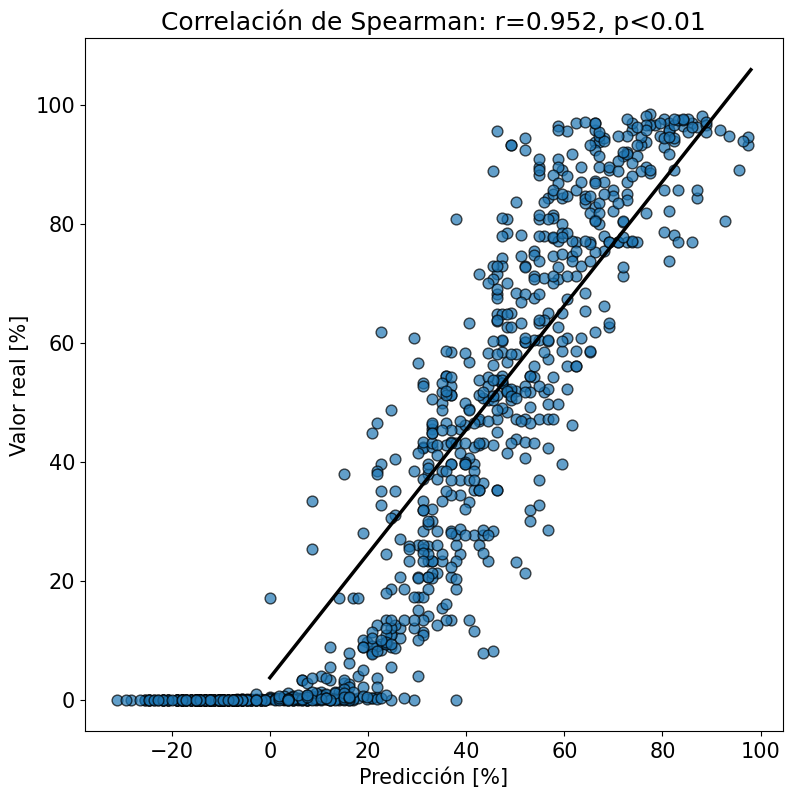

In [17]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 250 Hz:

In [18]:
band = 250

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

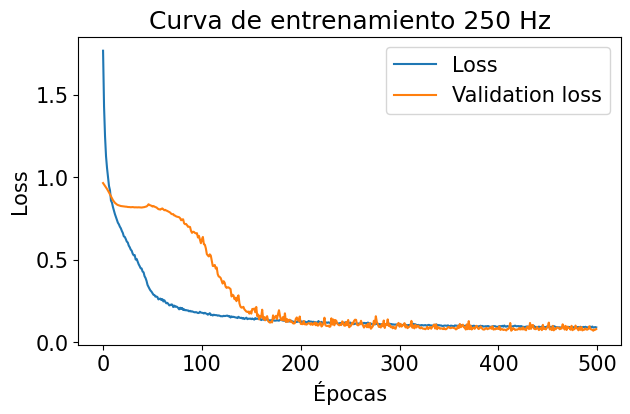

In [19]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([ 16.,  23.,  14.,  22., 138., 645., 313.,  30.]),
 array([-1.33   , -1.08875, -0.8475 , -0.60625, -0.365  , -0.12375,
         0.1175 ,  0.35875,  0.6    ]),
 <BarContainer object of 8 artists>)

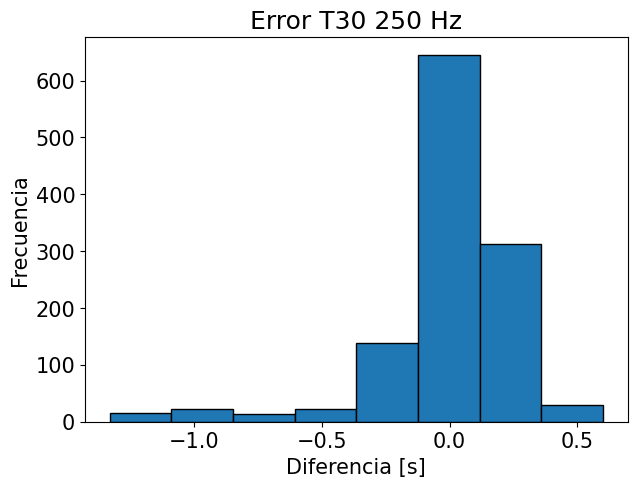

In [20]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([ 29., 848., 305.,  13.,   3.,   2.,   0.,   1.]),
 array([-1.66   , -0.71125,  0.2375 ,  1.18625,  2.135  ,  3.08375,
         4.0325 ,  4.98125,  5.93   ]),
 <BarContainer object of 8 artists>)

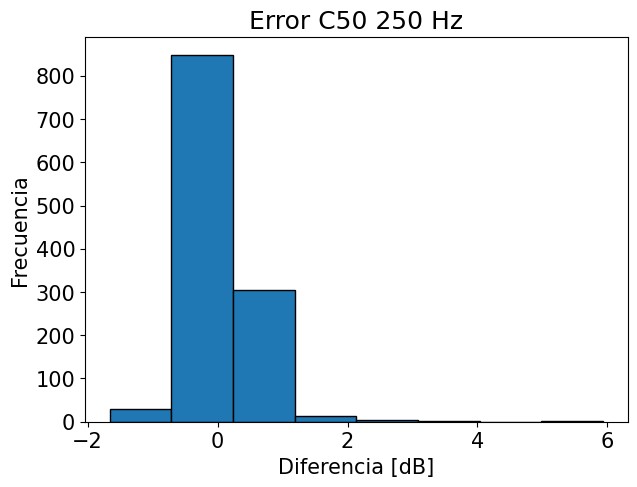

In [21]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([ 39., 962., 192.,   1.,   4.,   1.,   1.,   1.]),
 array([-1.19   , -0.50375,  0.1825 ,  0.86875,  1.555  ,  2.24125,
         2.9275 ,  3.61375,  4.3    ]),
 <BarContainer object of 8 artists>)

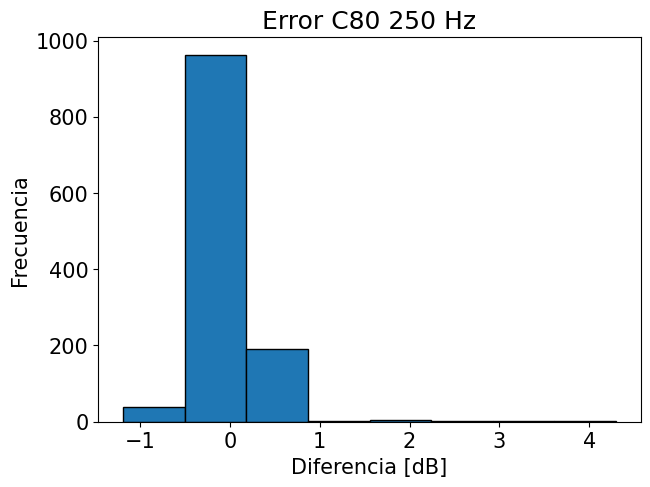

In [22]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  1.,   8.,  23., 170., 463., 373., 147.,  16.]),
 array([-0.66  , -0.5275, -0.395 , -0.2625, -0.13  ,  0.0025,  0.135 ,
         0.2675,  0.4   ]),
 <BarContainer object of 8 artists>)

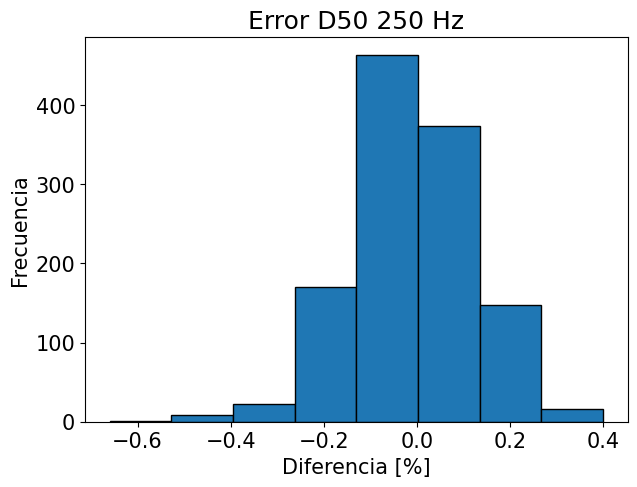

In [23]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

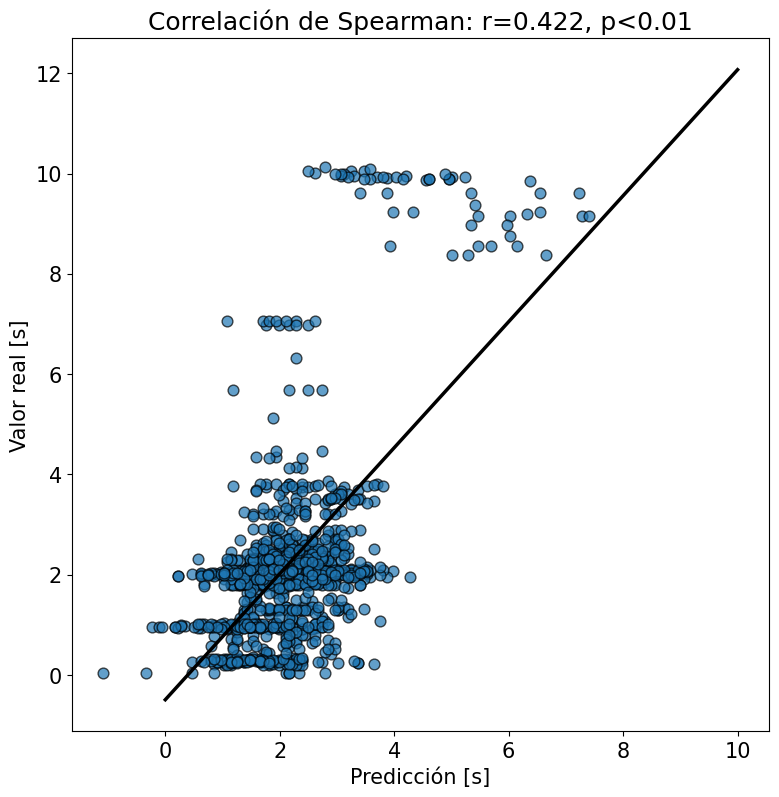

In [24]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

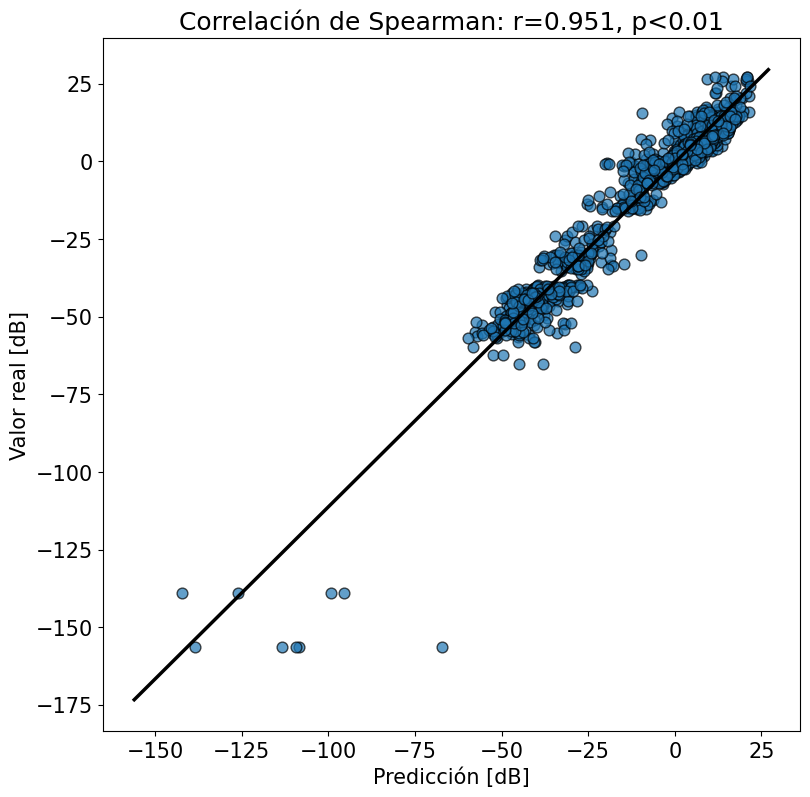

In [25]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

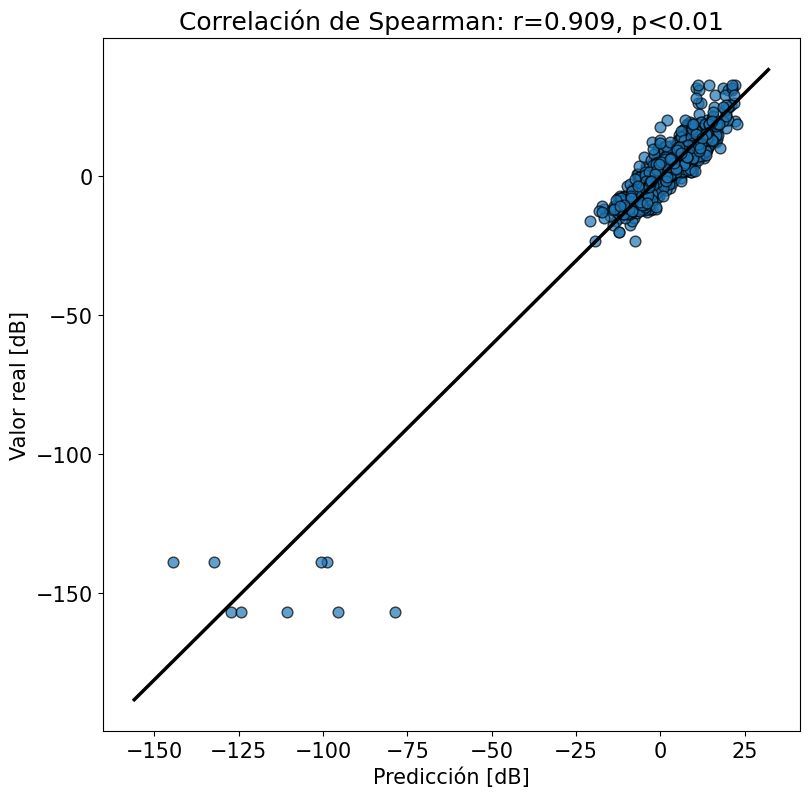

In [26]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

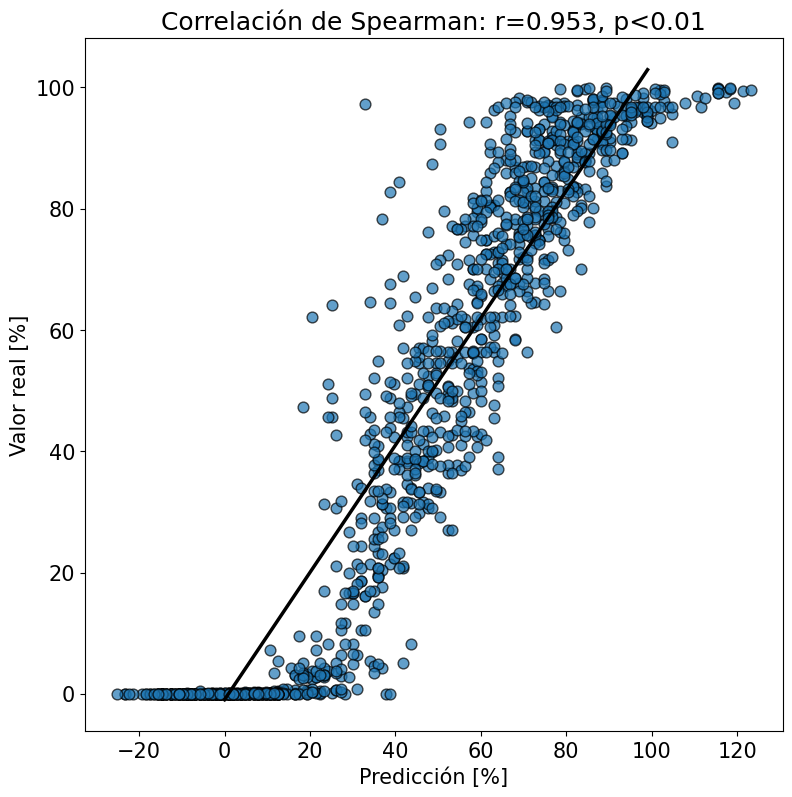

In [27]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 500 Hz:

In [28]:
band = 500

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

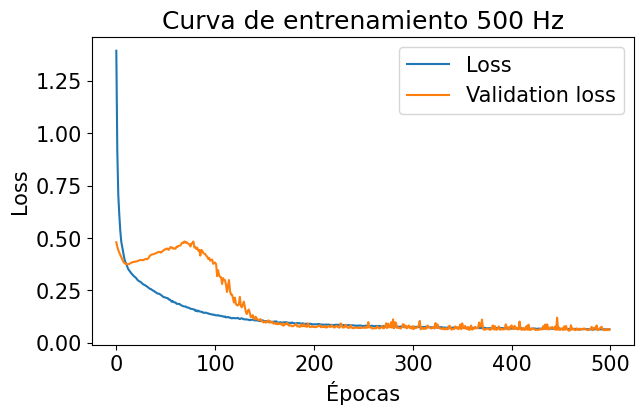

In [29]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  8.,   2.,   0.,   3.,  85., 573., 577.,  56.]),
 array([-1.92   , -1.59125, -1.2625 , -0.93375, -0.605  , -0.27625,
         0.0525 ,  0.38125,  0.71   ]),
 <BarContainer object of 8 artists>)

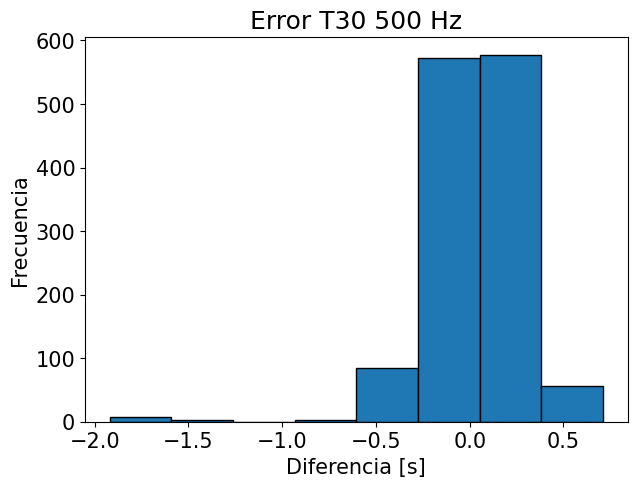

In [30]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  3.,  32., 245., 843., 148.,  25.,   6.,   2.]),
 array([-1.44   , -1.00625, -0.5725 , -0.13875,  0.295  ,  0.72875,
         1.1625 ,  1.59625,  2.03   ]),
 <BarContainer object of 8 artists>)

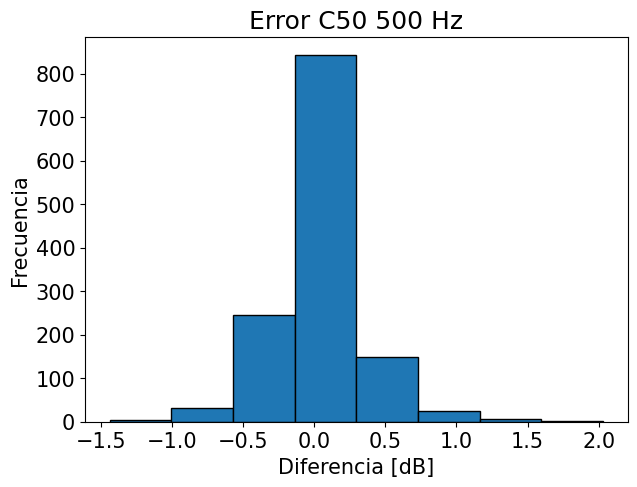

In [31]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  5.,   3.,  24.,  51., 212., 630., 339.,  40.]),
 array([-1.12  , -0.9125, -0.705 , -0.4975, -0.29  , -0.0825,  0.125 ,
         0.3325,  0.54  ]),
 <BarContainer object of 8 artists>)

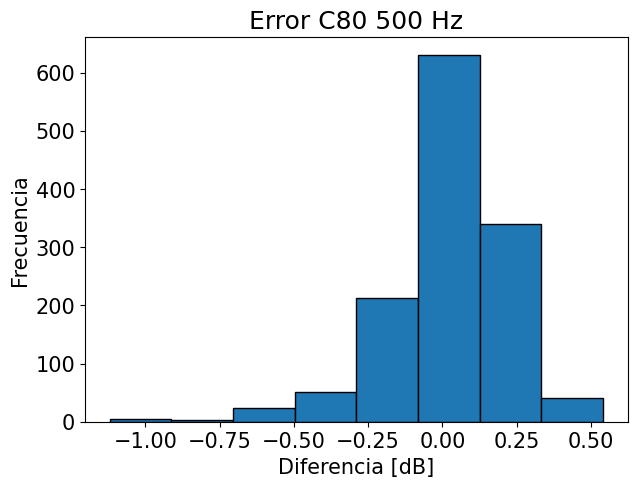

In [32]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([ 14.,  38., 143., 487., 362., 200.,  50.,  10.]),
 array([-0.45, -0.33, -0.21, -0.09,  0.03,  0.15,  0.27,  0.39,  0.51]),
 <BarContainer object of 8 artists>)

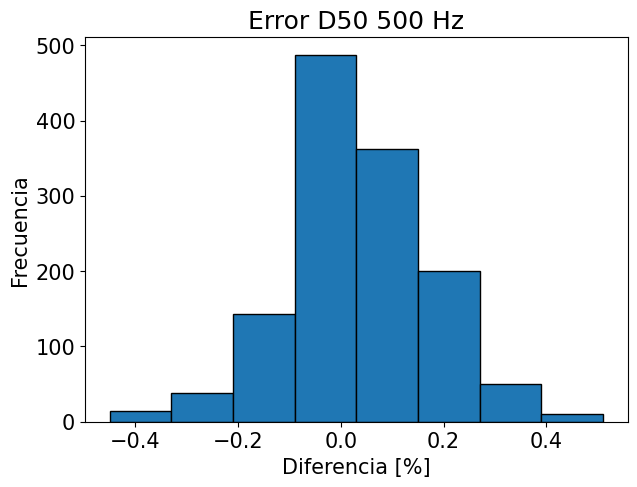

In [33]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

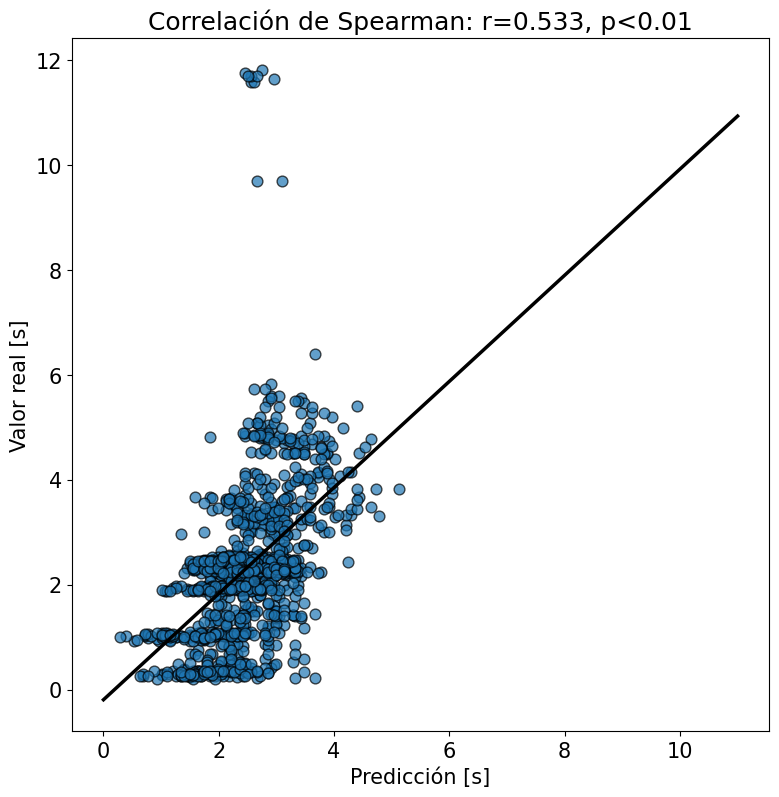

In [34]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

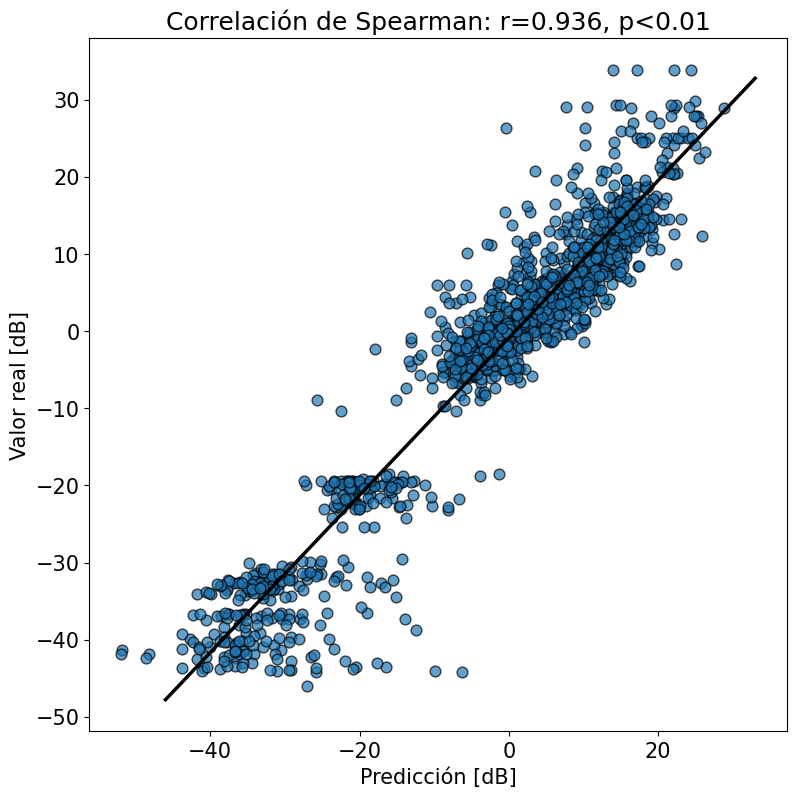

In [35]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

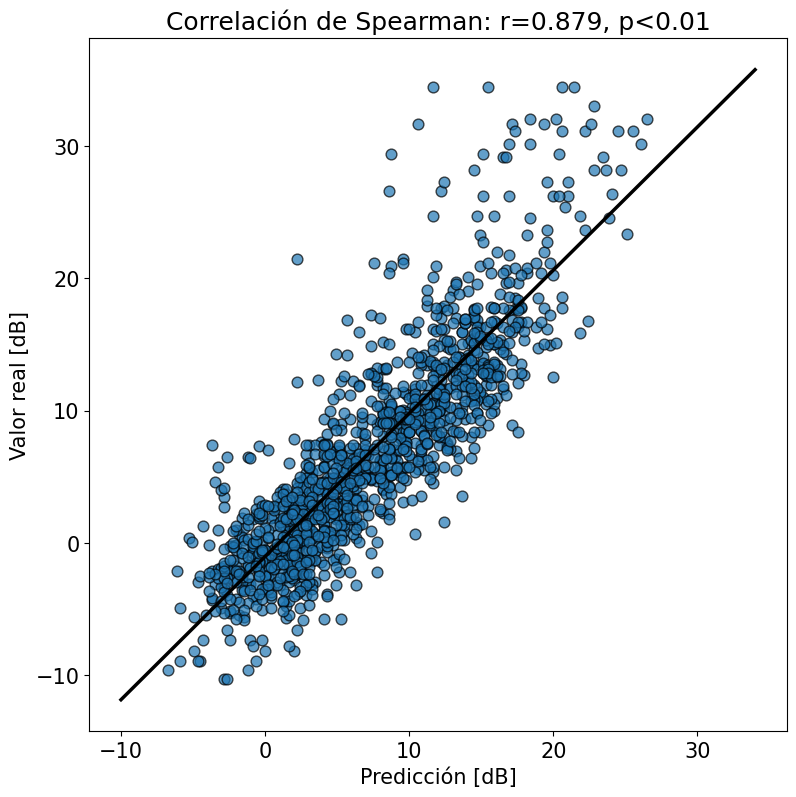

In [36]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

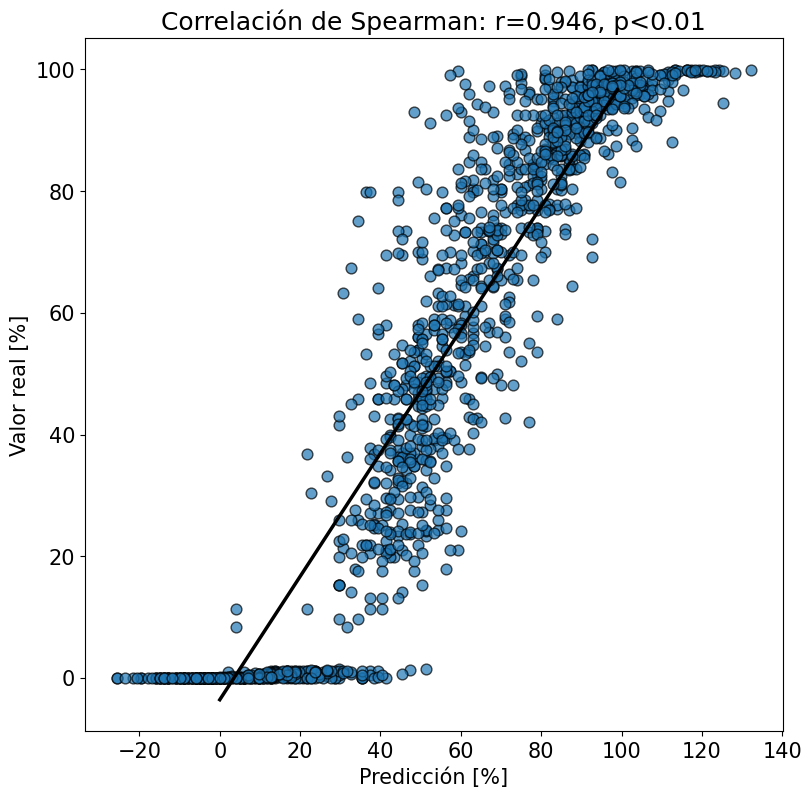

In [37]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 1000 Hz:

In [38]:
band = 1000

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

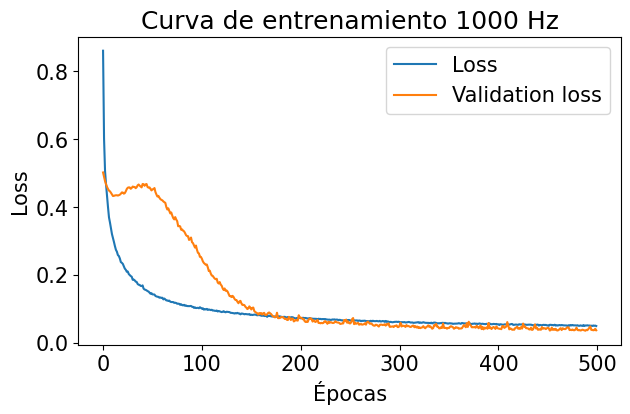

In [39]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  5.,   5.,  11., 136., 839., 268.,  30.,  10.]),
 array([-1.28   , -1.00375, -0.7275 , -0.45125, -0.175  ,  0.10125,
         0.3775 ,  0.65375,  0.93   ]),
 <BarContainer object of 8 artists>)

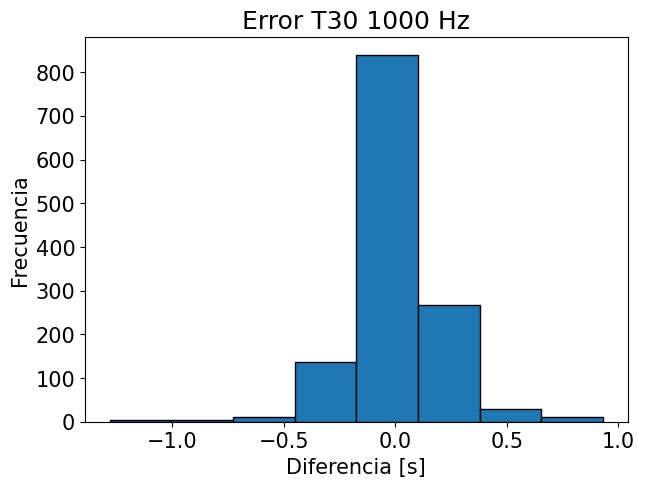

In [40]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  3.,   8.,  42., 280., 848., 110.,   8.,   5.]),
 array([-1.44  , -1.0975, -0.755 , -0.4125, -0.07  ,  0.2725,  0.615 ,
         0.9575,  1.3   ]),
 <BarContainer object of 8 artists>)

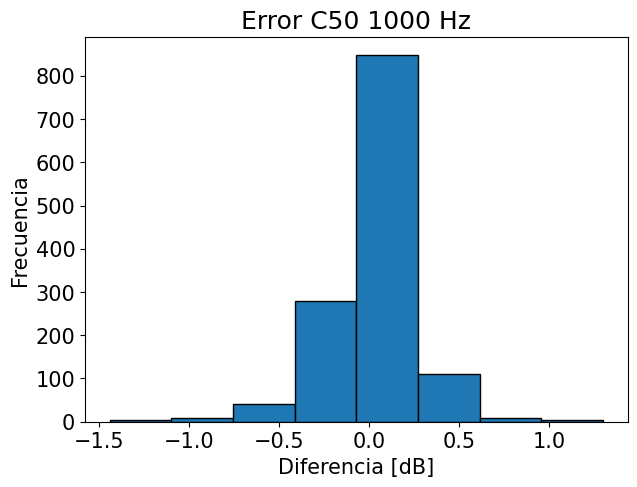

In [41]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  2.,   8.,   9.,   8.,  32., 360., 761., 124.]),
 array([-1.43, -1.2 , -0.97, -0.74, -0.51, -0.28, -0.05,  0.18,  0.41]),
 <BarContainer object of 8 artists>)

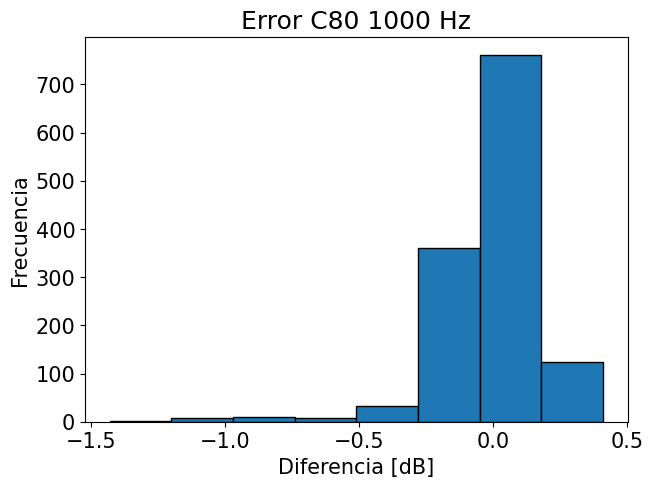

In [42]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([ 24., 113., 365., 361., 269., 140.,  23.,   9.]),
 array([-0.35   , -0.24875, -0.1475 , -0.04625,  0.055  ,  0.15625,
         0.2575 ,  0.35875,  0.46   ]),
 <BarContainer object of 8 artists>)

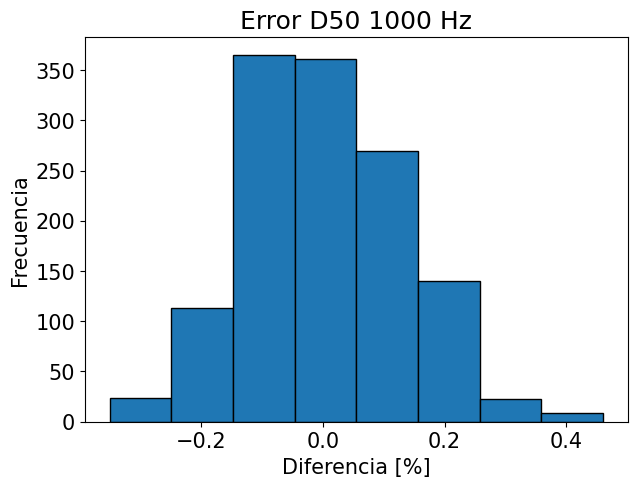

In [43]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

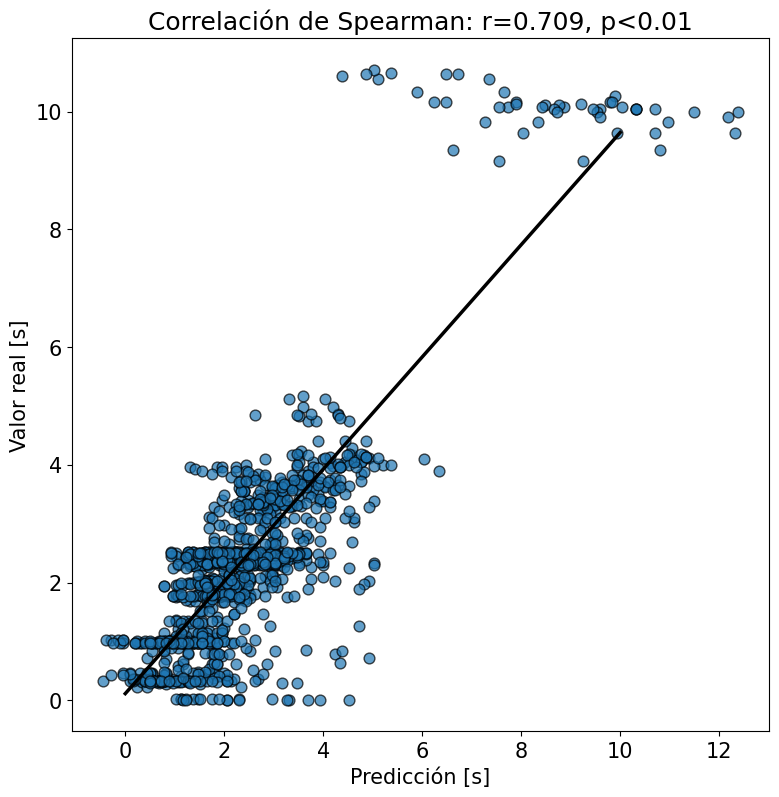

In [44]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

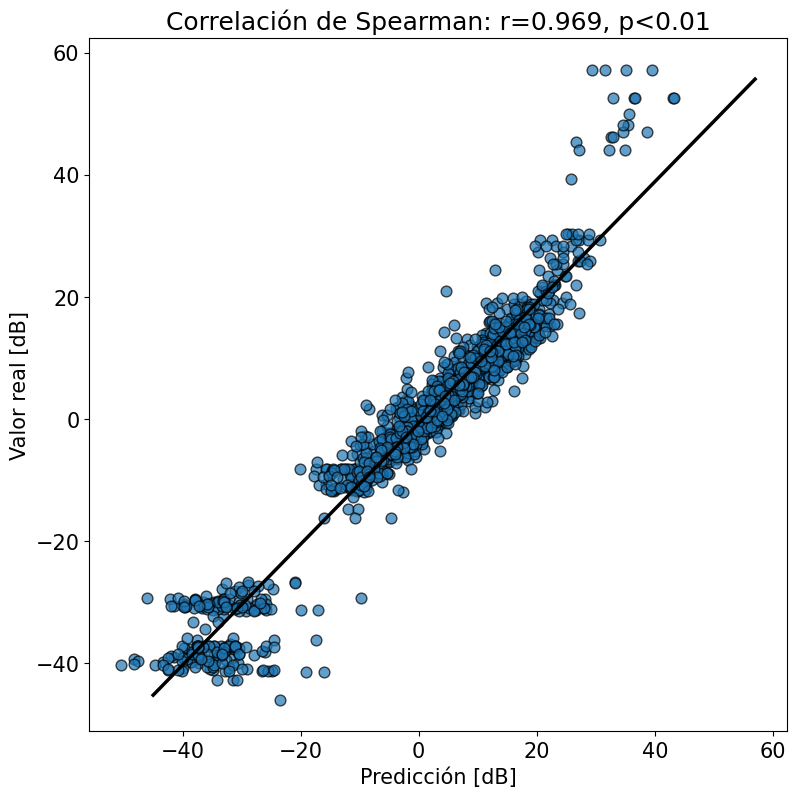

In [45]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

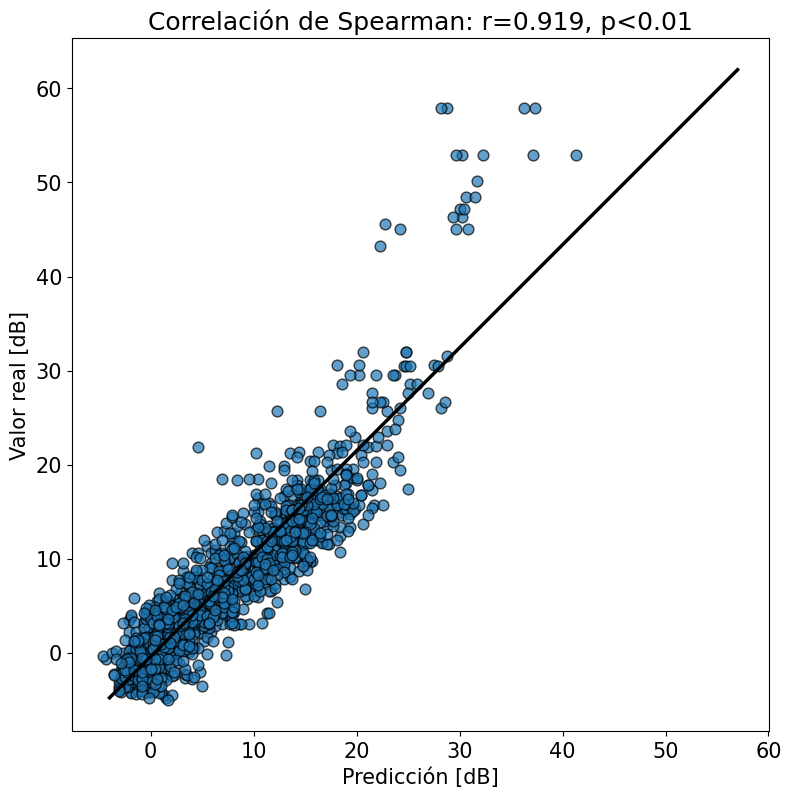

In [46]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

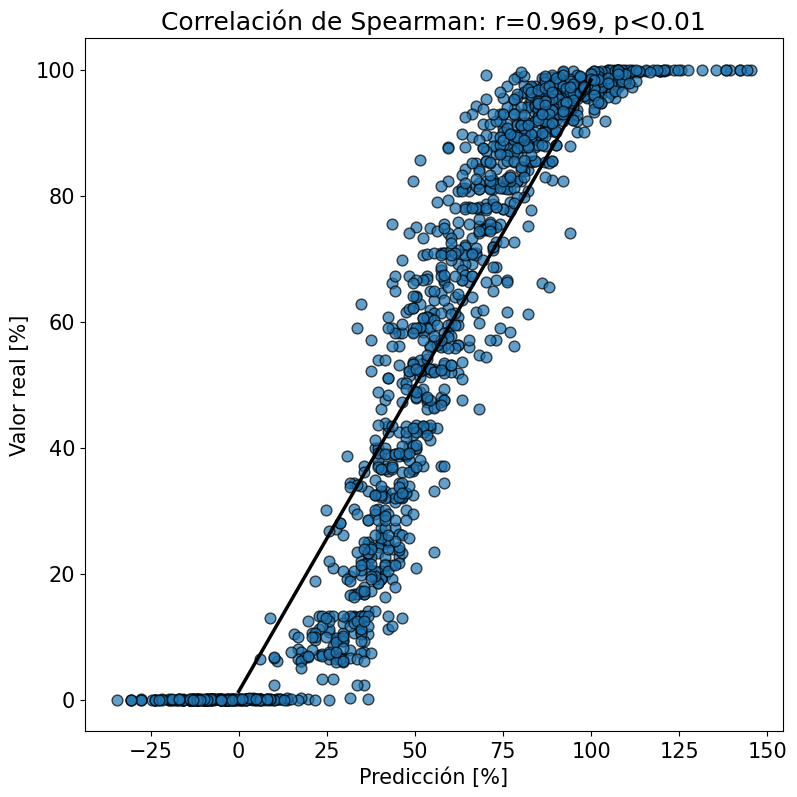

In [47]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 2000 Hz:

In [48]:
band = 2000

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

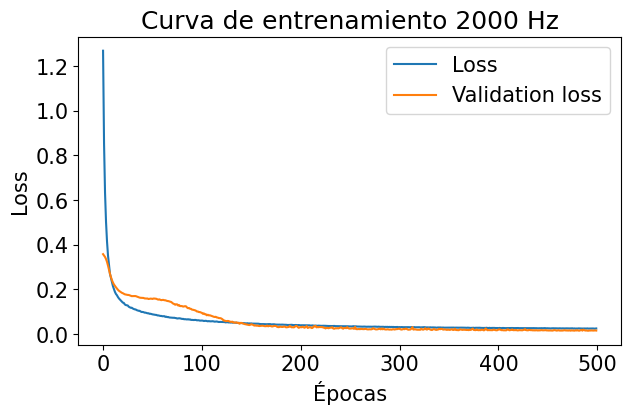

In [49]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  9.,  24., 224., 723., 280.,  27.,   1.,   4.]),
 array([-0.67  , -0.4775, -0.285 , -0.0925,  0.1   ,  0.2925,  0.485 ,
         0.6775,  0.87  ]),
 <BarContainer object of 8 artists>)

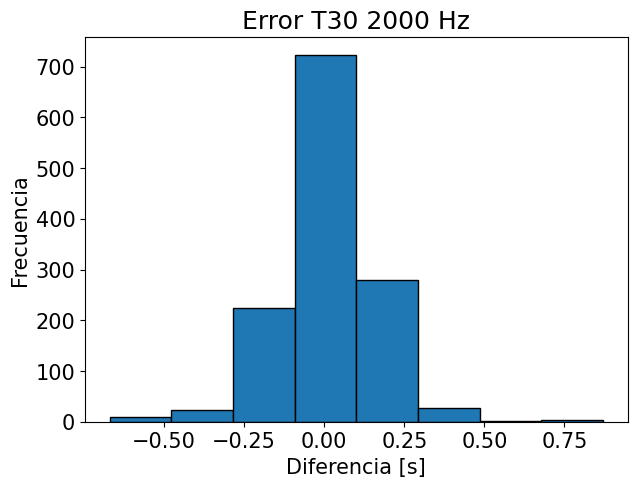

In [50]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  88., 1183.,   14.,    0.,    0.,    0.,    3.,    4.]),
 array([-0.72  , -0.1925,  0.335 ,  0.8625,  1.39  ,  1.9175,  2.445 ,
         2.9725,  3.5   ]),
 <BarContainer object of 8 artists>)

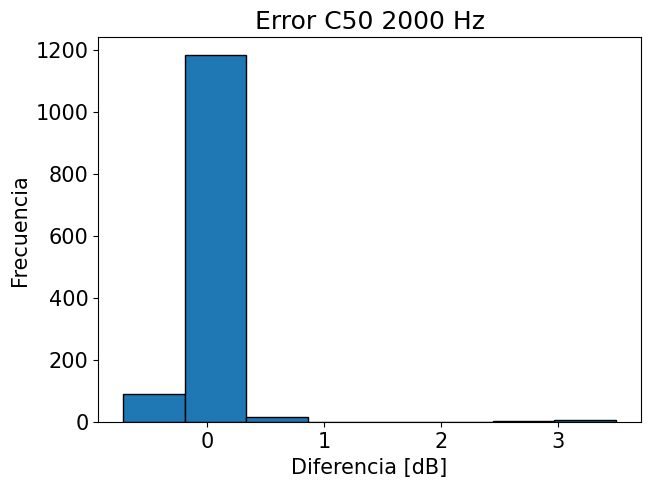

In [51]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([505., 780.,   0.,   0.,   0.,   0.,   0.,   7.]),
 array([-0.55  , -0.0325,  0.485 ,  1.0025,  1.52  ,  2.0375,  2.555 ,
         3.0725,  3.59  ]),
 <BarContainer object of 8 artists>)

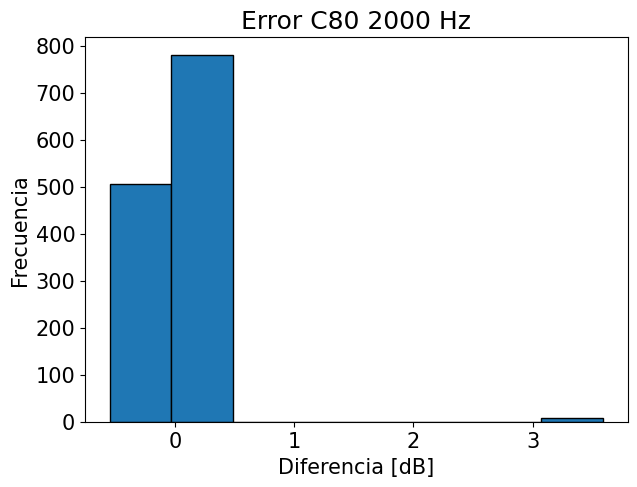

In [52]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  9.,  66., 215., 406., 394., 142.,  46.,  14.]),
 array([-0.3    , -0.22375, -0.1475 , -0.07125,  0.005  ,  0.08125,
         0.1575 ,  0.23375,  0.31   ]),
 <BarContainer object of 8 artists>)

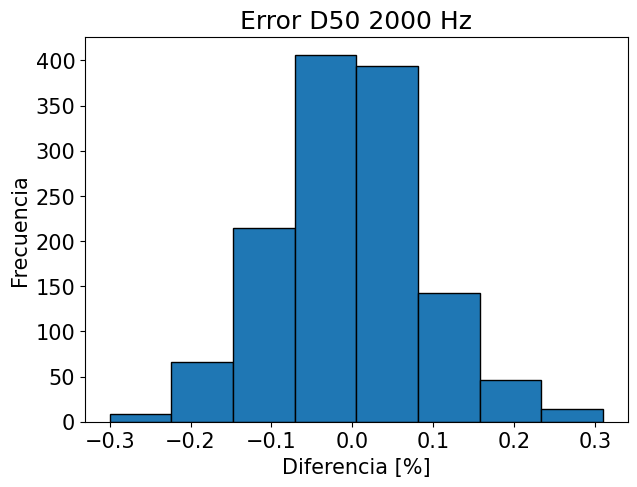

In [53]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

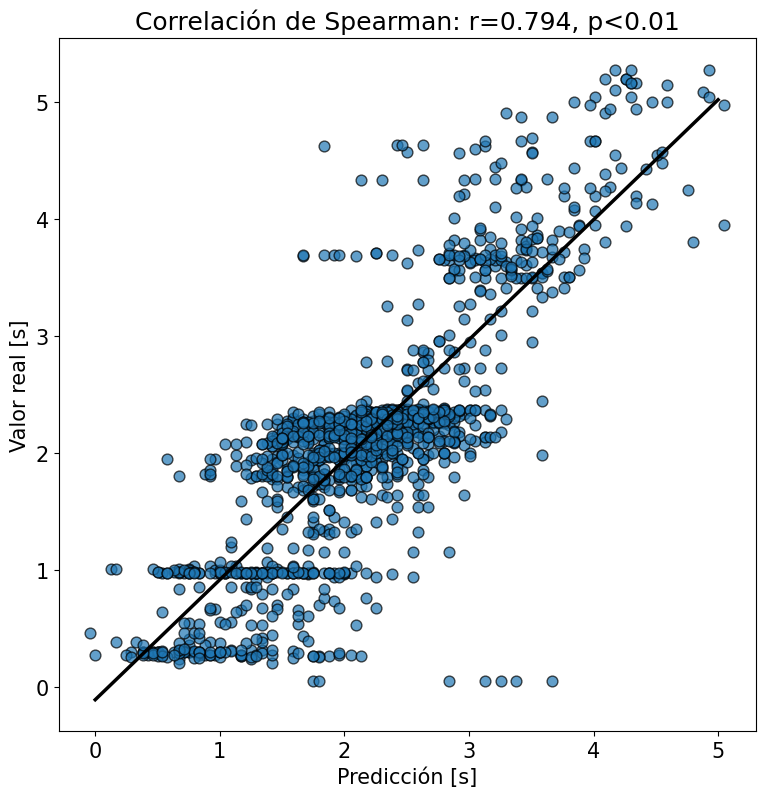

In [54]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

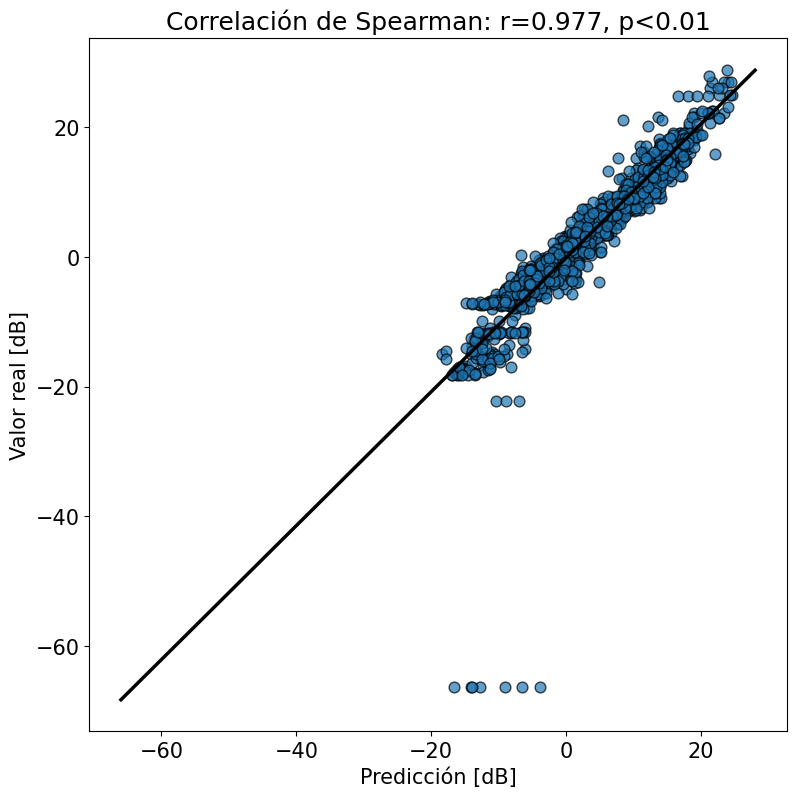

In [55]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

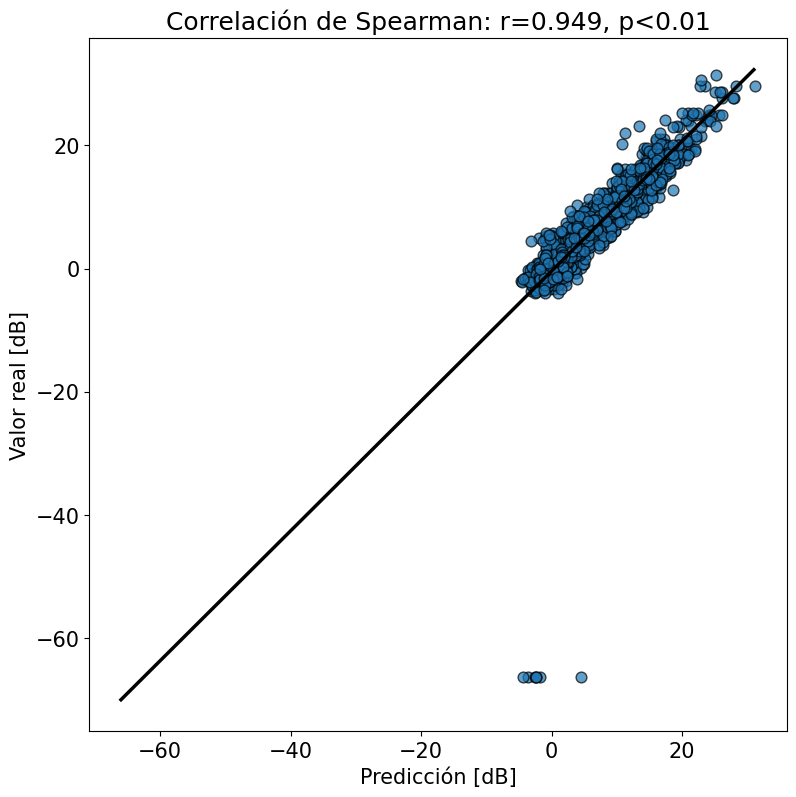

In [56]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

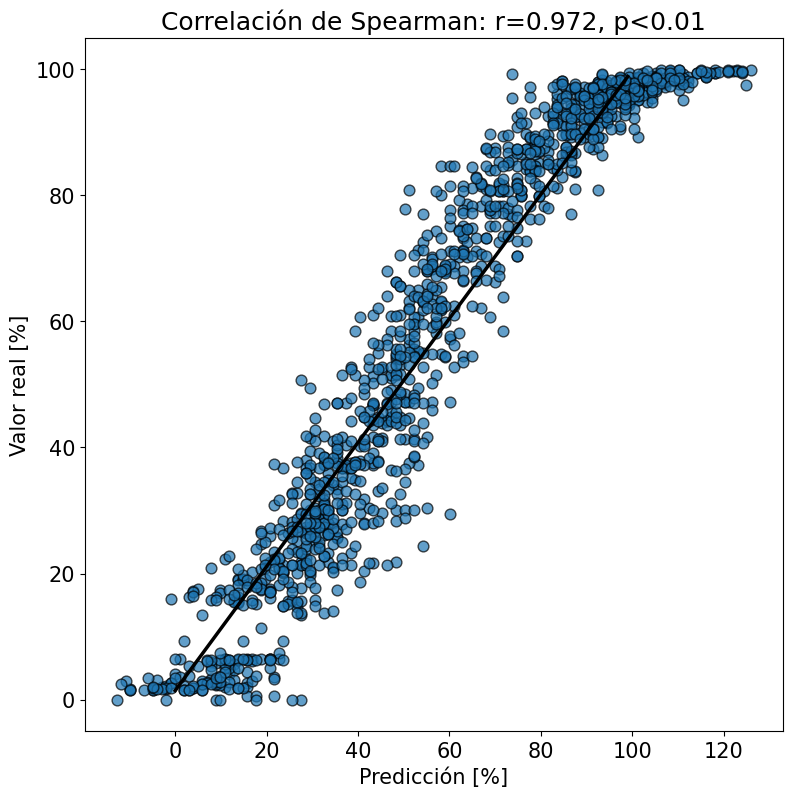

In [57]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 4000 Hz:

In [58]:
band = 4000

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

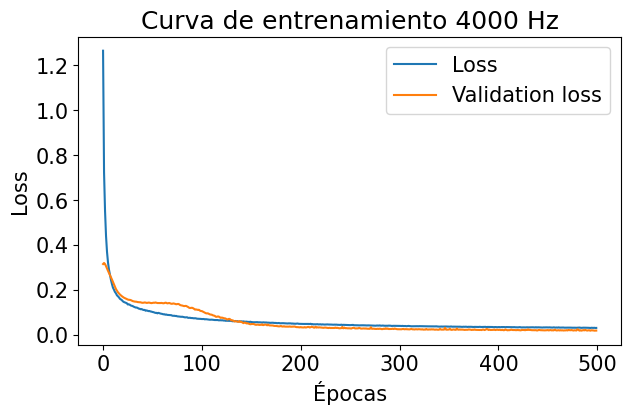

In [59]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([ 16.,  48., 400., 706., 134.,   1.,   0.,   1.]),
 array([-0.6    , -0.40375, -0.2075 , -0.01125,  0.185  ,  0.38125,
         0.5775 ,  0.77375,  0.97   ]),
 <BarContainer object of 8 artists>)

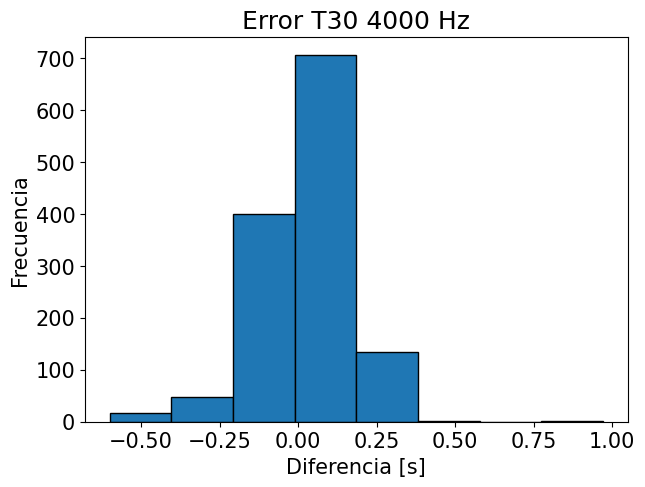

In [60]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([434., 857.,  11.,   3.,   0.,   0.,   0.,   1.]),
 array([-0.49   , -0.08375,  0.3225 ,  0.72875,  1.135  ,  1.54125,
         1.9475 ,  2.35375,  2.76   ]),
 <BarContainer object of 8 artists>)

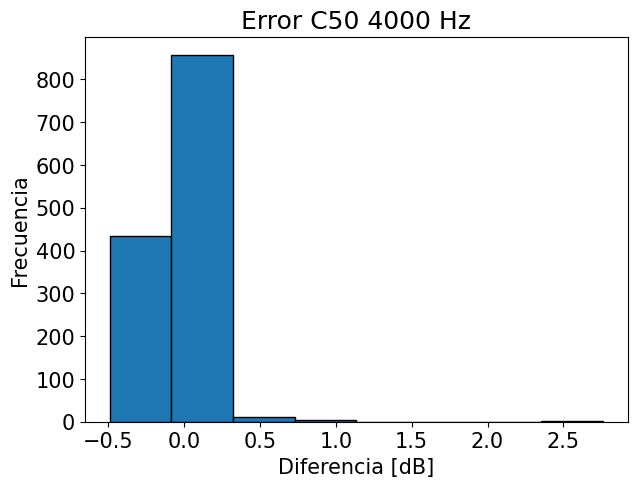

In [61]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([451., 853.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.45  , -0.0425,  0.365 ,  0.7725,  1.18  ,  1.5875,  1.995 ,
         2.4025,  2.81  ]),
 <BarContainer object of 8 artists>)

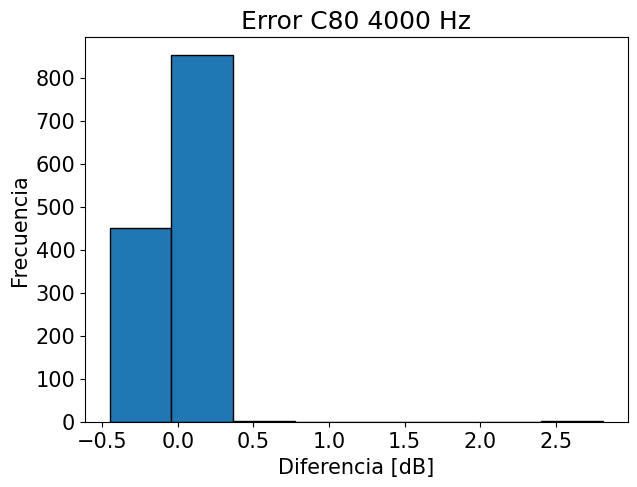

In [62]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([ 25., 128., 385., 509., 205.,  39.,  11.,   4.]),
 array([-0.35   , -0.24375, -0.1375 , -0.03125,  0.075  ,  0.18125,
         0.2875 ,  0.39375,  0.5    ]),
 <BarContainer object of 8 artists>)

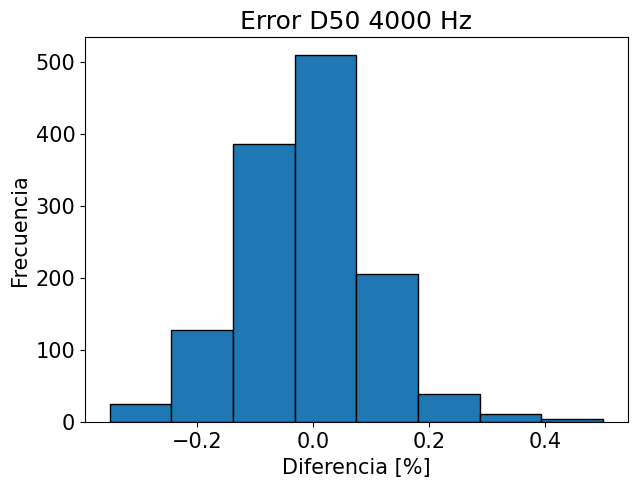

In [63]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

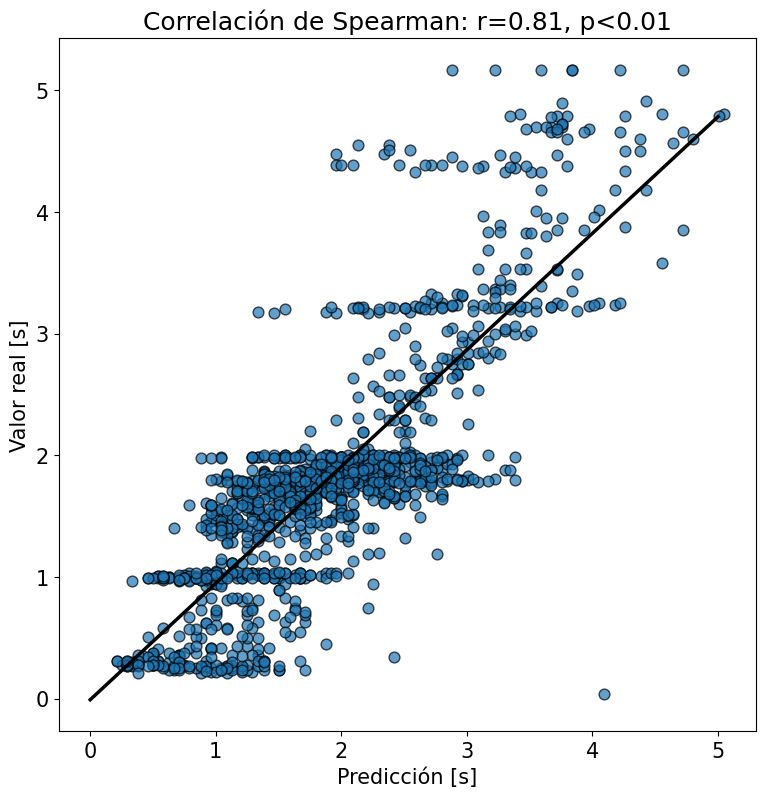

In [64]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

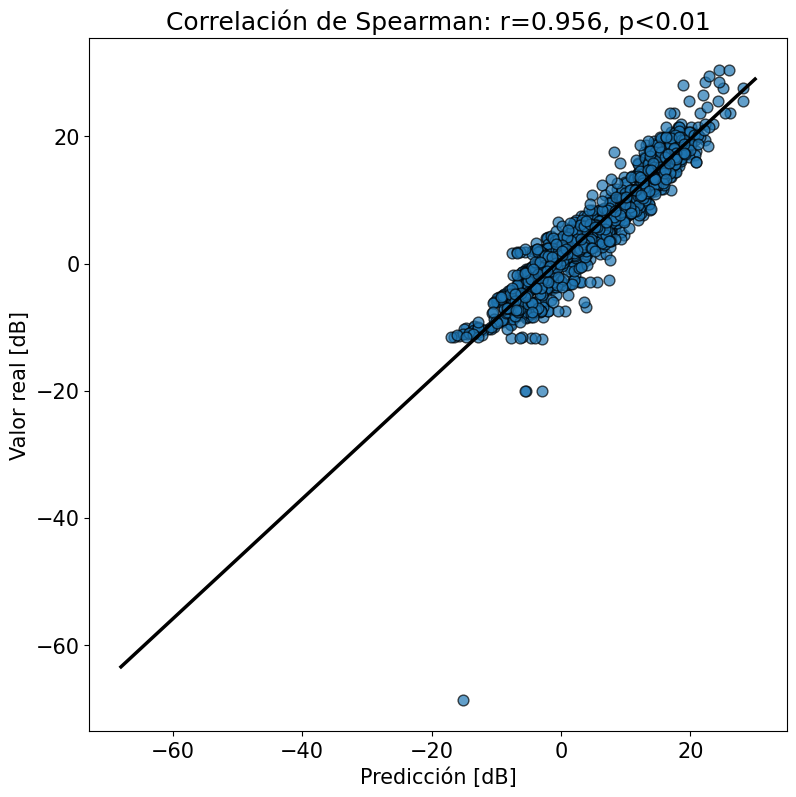

In [65]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

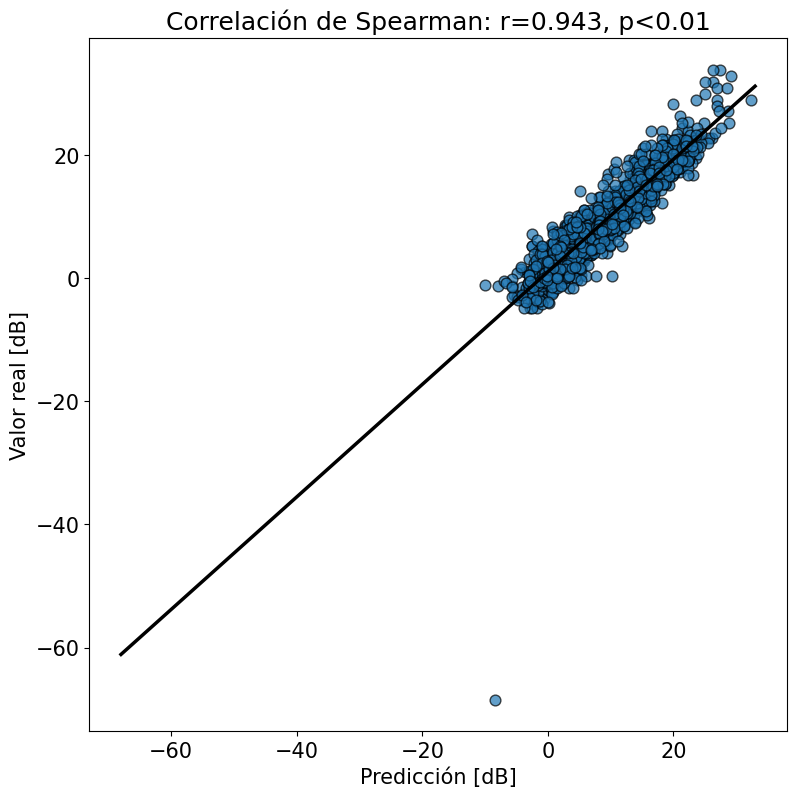

In [66]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

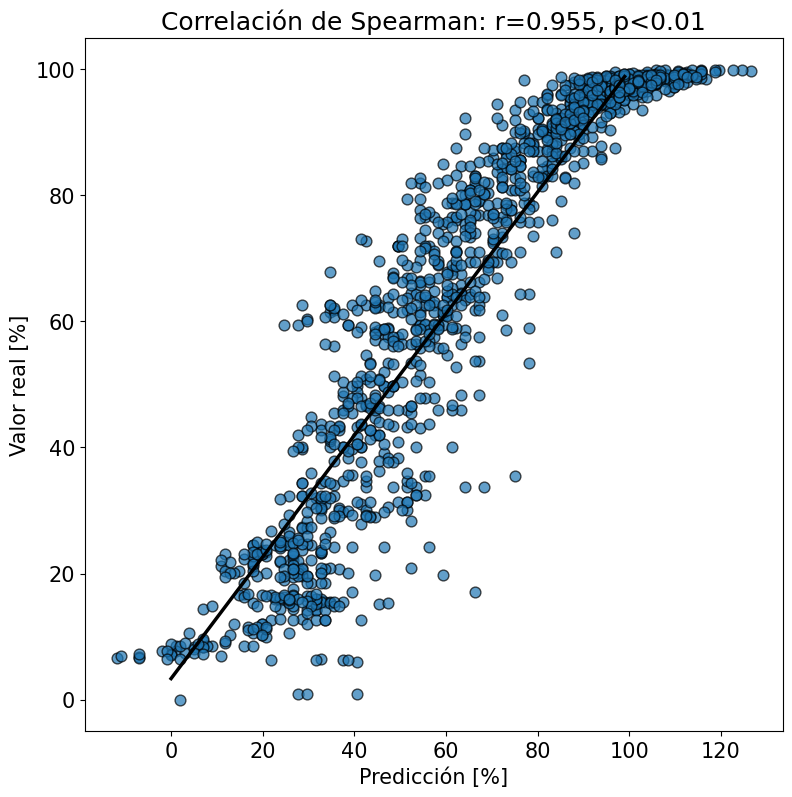

In [67]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 8000 Hz:

In [68]:
band = 8000

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

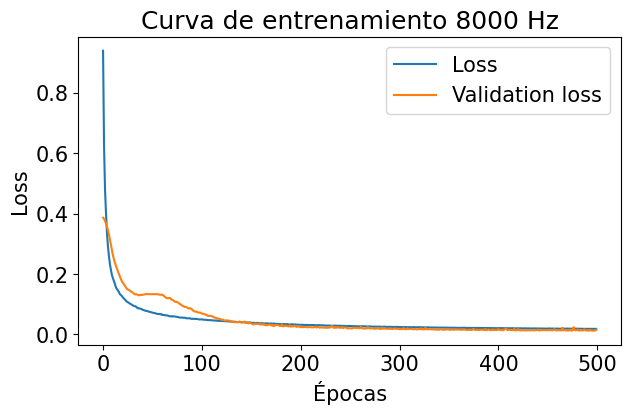

In [69]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  5.,  33., 101., 352., 542., 220.,  41.,  10.]),
 array([-0.55   , -0.42875, -0.3075 , -0.18625, -0.065  ,  0.05625,
         0.1775 ,  0.29875,  0.42   ]),
 <BarContainer object of 8 artists>)

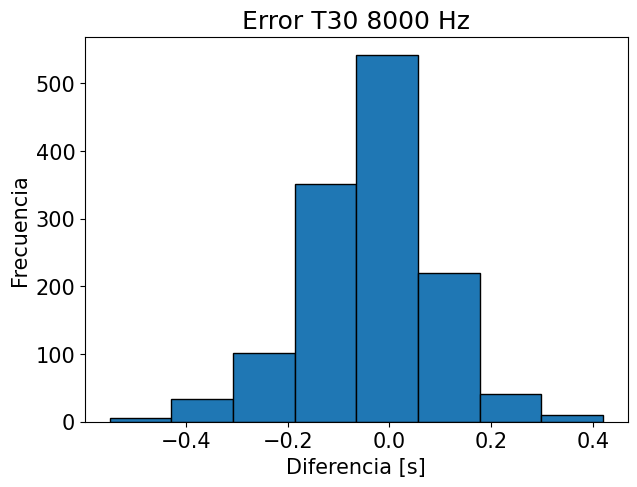

In [70]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([ 19., 161., 586., 437.,  84.,  14.,   2.,   1.]),
 array([-0.32  , -0.1875, -0.055 ,  0.0775,  0.21  ,  0.3425,  0.475 ,
         0.6075,  0.74  ]),
 <BarContainer object of 8 artists>)

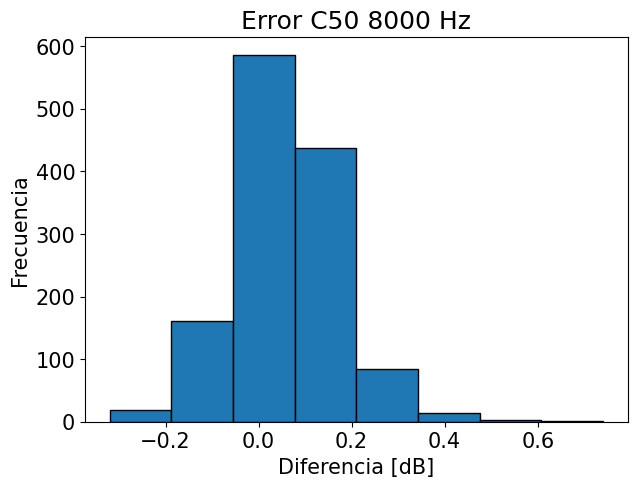

In [71]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  3.,  13.,  73., 314., 588., 265.,  36.,  12.]),
 array([-0.42 , -0.315, -0.21 , -0.105,  0.   ,  0.105,  0.21 ,  0.315,
         0.42 ]),
 <BarContainer object of 8 artists>)

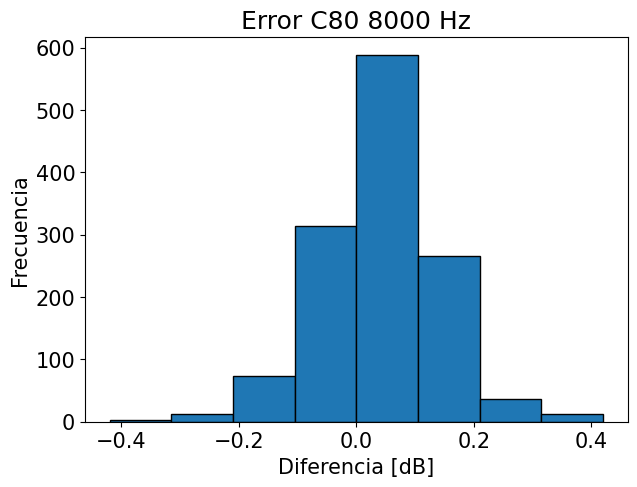

In [72]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([ 18., 157., 447., 396., 224.,  43.,  18.,   1.]),
 array([-0.27 , -0.175, -0.08 ,  0.015,  0.11 ,  0.205,  0.3  ,  0.395,
         0.49 ]),
 <BarContainer object of 8 artists>)

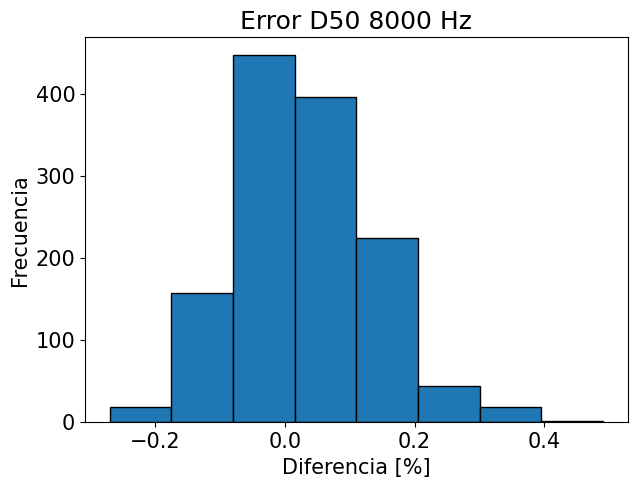

In [73]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

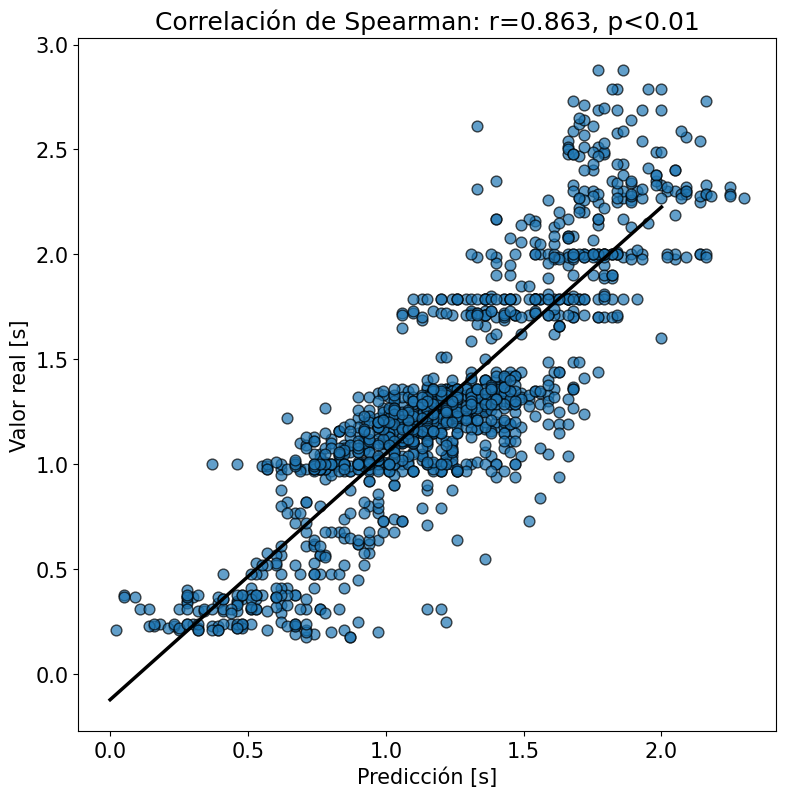

In [74]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

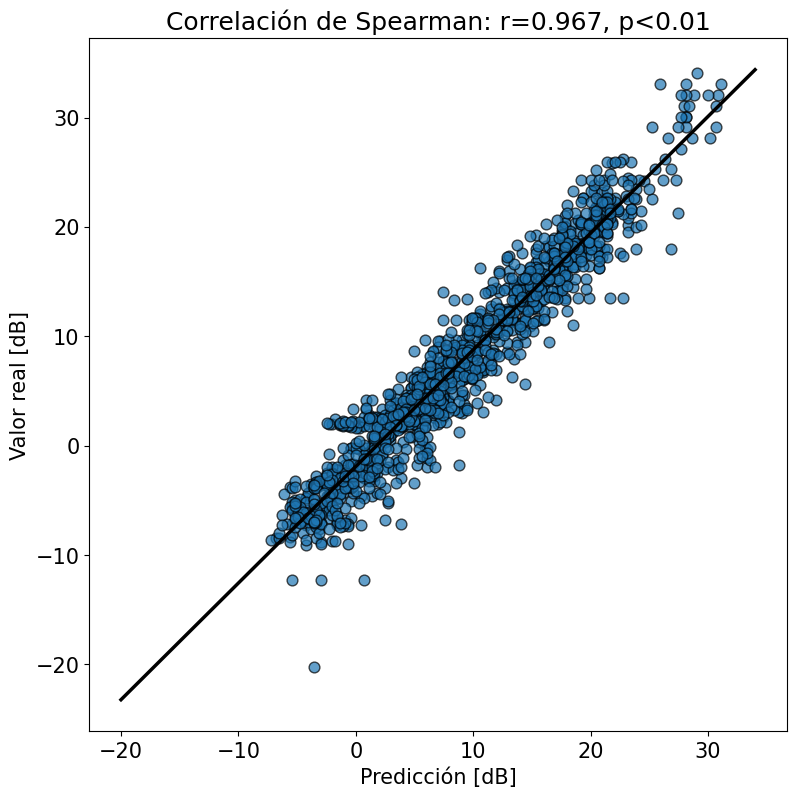

In [75]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

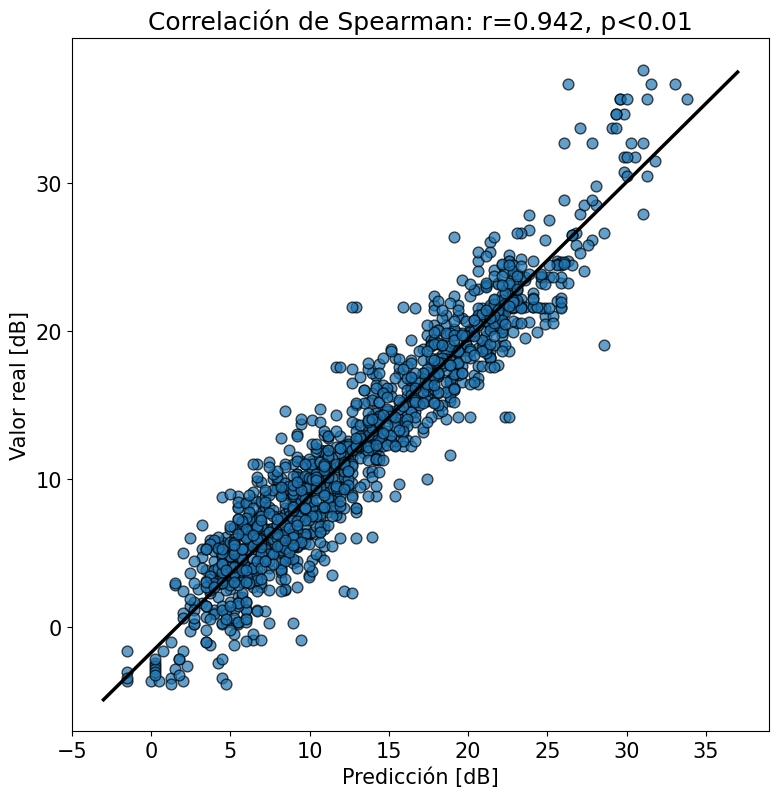

In [76]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

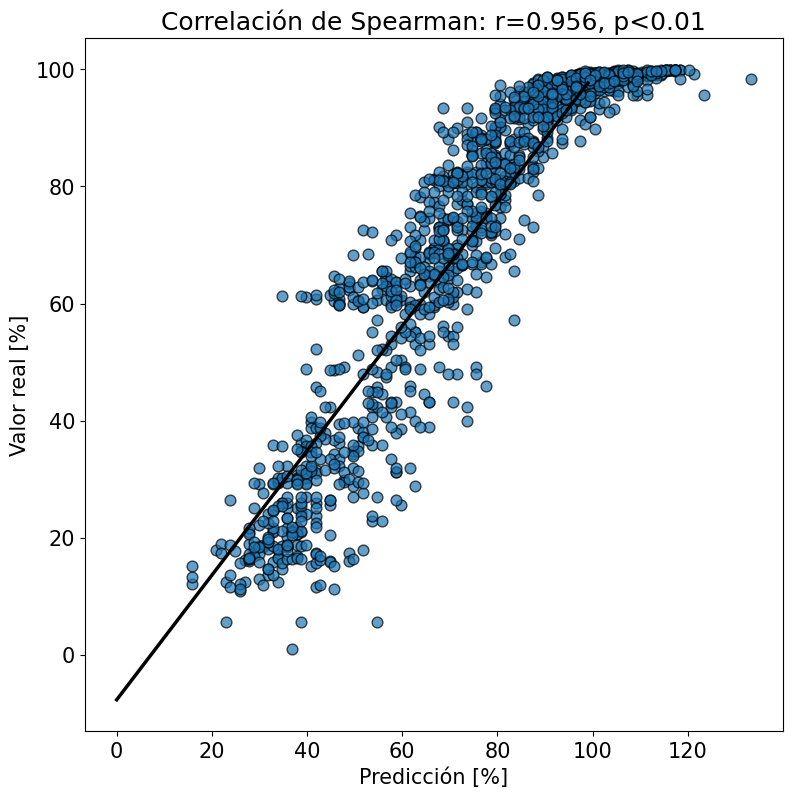

In [77]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

## 3) Estimación con el modelo entrenado:

In [78]:
sys.path.append('../code')
import modeling

In [79]:
blind_estimation_model = modeling.model(filters, kernel_size, activation, pool_size, learning_rate)
blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_125.h5')

In [80]:
from sklearn.model_selection import train_test_split
tae = list(db.tae.to_numpy())[0:10]
descriptors = list(db.descriptors.to_numpy())[0:10]

tae, descriptors = modeling.reshape_data(tae, descriptors)

X_train, X_test, y_train, y_test = train_test_split(tae, descriptors, test_size=0.2, random_state=222)

y_train, y_test, T30_perc_95, C50_perc_95, C80_perc_95, D50_perc_95 = modeling.normalize_descriptors(descriptors, y_train, y_test)

predict = modeling.prediction(blind_estimation_model, X_test, y_test)

err_t30, err_c50, err_c80, err_d50 = modeling.descriptors_err(predict, y_test)

1/1 [==============================] - 0s 18ms/step


In [81]:
print(predict)
print(y_test)

[array([ 0.68, -0.52, -0.24,  0.27], dtype=float32), array([ 0.62, -0.09,  0.1 ,  0.47], dtype=float32)]
[[[ 0.96038381]
  [-0.71948543]
  [ 0.74426696]
  [ 0.87701426]]

 [[ 0.93681816]
  [-7.69296556]
  [-0.06436462]
  [ 0.43410021]]]
